In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import glob,sys,os,pickle,gc
from tqdm import tqdm

In [2]:
# in_parquet = "/home/antslab/data_hdd4t/pcap_process/pcap_spark/2020_01_10/中華電信/parquet/2020_01_10_country_session_withtime_v4.parquet"
in_parquet = "/home/antslab/data_hdd4t/pcap_process/pcap_spark/2020_01_10/中華電信/parquet/2020_01_10_session_v5.parquet"
df = pd.read_parquet(in_parquet)
pickle_dir = '/home/antslab/spark_data/pcap_inter/2020_01_10/中華電信/case_pickles/'
df

frame_time                                    frame_time_list  \
0        1.578613e+09  [1578613242.892854, 1578613242.893078, 1578613...   
1        1.578614e+09  [1578613660.19322, 1578613660.193429, 15786136...   
2        1.578616e+09  [1578615527.35932, 1578615527.359642, 15786155...   
3        1.578616e+09  [1578615926.49383, 1578615926.494031, 15786159...   
4        1.578616e+09             [1578616184.889115, 1578616184.889325]   
...               ...                                                ...   
3657445  1.578663e+09  [1578663231.137809, 1578663231.138045, 1578663...   
3657446  1.578610e+09             [1578610350.578526, 1578610350.578797]   
3657447  1.578616e+09             [1578615928.679823, 1578615928.680061]   
3657448  1.578618e+09             [1578617722.776724, 1578617722.776943]   
3657449  1.578620e+09              [1578620452.315987, 1578620452.31627]   

         session_duration  session_packets  tcp_window_size_value_avg  \
0              102.137154               24                     5381.5   
1                1.107871               24                     5381.5   
2              112.831184               24                     5381.5   
3                0.896946               24                     5381.5   
4                0.000210                2                     5381.5   
...                   ...              ...                        ...   
3657445          1.204707               15                     4078.6   
3657446          0.000271                2                    25931.0   
3657447          0.000238                2                    25931.0   
3657448          0.000219                2                    25931.0   
3657449          0.000283                2                    25931.0   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
0                          10763.0               0.0            480.0   
1                          10763.0               0.0            480.0   
2                          10763.0               0.0            480.0   
3                          10763.0               0.0            480.0   
4                          10763.0               0.0             40.0   
...                            ...               ...              ...   
3657445                    29200.0            1110.0            496.0   
3657446                    51862.0               0.0             40.0   
3657447                    51862.0               0.0             40.0   
3657448                    51862.0               0.0             40.0   
3657449                    51862.0               0.0             40.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
0            31978.0         23.0           12.0            0.0   
1            31978.0         23.0           12.0            0.0   
2            31978.0         23.0           12.0            0.0   
3            31978.0         23.0           12.0            0.0   
4            31978.0         23.0            1.0            0.0   
...              ...          ...            ...            ...   
3657445      35708.0         22.0           14.0            2.0   
3657446      50657.0       5555.0            1.0            0.0   
3657447      50657.0       5555.0            1.0            0.0   
3657448      50657.0       5555.0            1.0            0.0   
3657449      50657.0       5555.0            1.0            0.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn          ip_src  \
0                   0.0             12.0           12.0     1.174.7.187   
1                   0.0             12.0           12.0     1.174.7.187   
2                   0.0             12.0           12.0     1.174.7.187   
3                   0.0             12.0           12.0     1.174.7.187   
4                   0.0              1.0            1.0     1.174.7.187   
...                 ...              ...            ...             ...   
3657445       

In [170]:
print(df.domain.value_counts().head(20))
print(df.isp.value_counts().head(20))
print(df.describe())
# df = df[(df.domain != 'googlebot.com')&(df.isp!='Googlebot')]
print(df.columns)
df['udp_payload_size'] = df.udp_length_sum - (df.session_packets*8)
df.describe()

hinet.net                        313385
googlebot.com                    101389
censys.io                         56043
vhost.live                        46912
netsystemsresearch.com            23667
amazonaws.com                     20127
linode.com                        19366
163data.com.cn                    17952
hostpark.com.ua                   16658
example.com                       16188
shadowserver.org                  16038
deployvm.net                      15261
linkone.co.kr                     13259
vnpt.vn                           12999
rapid7.com                        12420
no-reverse-dns-configured.com     12122
tedata.net                        11658
starhub.net.sg                     9901
prod-infinitum.com.mx              9136
ridgewireless.net                  8828
Name: domain, dtype: int64
HiNet                                             546796
RisingNet, LLC                                    449640
China Telecom                                     345446
In

frame_time  session_duration  session_packets  \
count  3.657450e+06      3.657450e+06     3.657450e+06   
mean   1.578623e+09      6.093824e+01     1.300036e+02   
std    2.792762e+04      4.611554e+02     1.034435e+04   
min    1.578585e+09      0.000000e+00     1.000000e+00   
25%    1.578597e+09      2.639294e-04     2.000000e+00   
50%    1.578621e+09      3.248769e-01     4.000000e+00   
75%    1.578647e+09      4.105058e+01     1.200000e+01   
max    1.578671e+09      8.637429e+04     8.134306e+06   

       tcp_window_size_value_avg  tcp_window_size_value_max  tcp_payload_size  \
count               3.498656e+06               3.498656e+06      3.492640e+06   
mean                1.719121e+04               3.393200e+04      1.198148e+05   
std                 1.642877e+04               2.764565e+04      6.685278e+06   
min                 0.000000e+00               0.000000e+00      0.000000e+00   
25%                 7.413333e+02               1.200000e+03      0.000000e+00   
50%                 9.869017e+03               2.920000e+04      0.000000e+00   
75%                 3.084500e+04               6.292000e+04      0.000000e+00   
max                 6.553500e+04               6.553500e+04      1.073018e+10   

       tcp_hdr_len_sum   tcp_srcport   tcp_dstport  tcp_flags_ack  \
count     3.498669e+06  3.498928e+06  3.498928e+06   3.498656e+06   
mean      3.638940e+03  3.691517e+04  1.348772e+04   1.098109e+02   
std       2.729828e+05  2.072754e+04  1.835157e+04   8.516643e+03   
min       8.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%       4.400000e+01  1.986200e+04  4.450000e+02   1.000000e+00   
50%       1.200000e+02  4.322600e+04  3.389000e+03   2.000000e+00   
75%       2.920000e+02  5.378200e+04  2.383100e+04   6.000000e+00   
max       2.825125e+08  6.553500e+04  6.553500e+04   8.043125e+06   

       tcp_flags_fin  tcp_flags_push  tcp_flags_reset  tcp_flags_syn  \
count   3.498656e+06    3.498656e+06     3.498656e+06   3.498656e+06   
mean    2.482639e+00    1.035155e+01     2.177693e+01   2.445310e+01   
std     3.770220e+02    1.666543e+03     2.770905e+03   3.038223e+03   
min     0.000000e+00    0.000000e+00     0.000000e+00   0.000000e+00   
25%     0.000000e+00    0.000000e+00     1.000000e+00   1.000000e+00   
50%     0.000000e+00    0.000000e+00     1.000000e+00   1.000000e+00   
75%     0.000000e+00    0.000000e+00     3.000000e+00   3.000000e+00   
max     3.375850e+05    1.393826e+06     1.534494e+06   2.185923e+06   

         ip_ttl_avg    ip_ttl_max  frame_len_sum      latitude     longitude  \
count  3.657450e+06  3.657450e+06   3.657450e+06  3.657078e+06  3.657078e+06   
mean   1.179465e+02  1.648074e+02   1.178985e+05  3.605864e+01  3.228221e+01   
std    4.837868e+01  7.604533e+01   2.156455e+06  1.549229e+01  9.334967e+01   
min    1.000000e+00  1.000000e+00  -1.595640e+09 -5.480000e+01 -1.654064e+02   
25%    8.500000e+01  1.040000e+02   1.180000e+02  2.504780e+01 -4.793410e+01   
50%    1.040000e+02  1.240000e+02   3.060000e+02  3.654700e+01  3.761720e+01   
75%    1.515000e+02  2.380000e+02   8.040000e+02  4.760080e+01  1.187778e+02   
max    2.520000e+02  2.520000e+02   1.912220e+09  7.037670e+01  1.784167e+02   

       udp_length_sum    udp_srcport    udp_dstport  udp_payload_size  
count    1.319090e+05  131909.000000  131909.000000      1.319090e+05  
mean     2.858959e+03   24890.366889   25466.424975      2.781601e+03  
std      6.260828e+05   21722.741008   21811.741573      6.169129e+05  
min      0.000000e+00       0.000000       0.000000     -8.000000e+00  
25%      2.500000e+01    3283.000000    4500.000000      1.700000e+01  
50%      5.000000e+01   21328.000000   21934.000000      4.000000e+01  
75%      1.460000e+02   46864.000000   47808.000000      1.250000e+02  
max      2.241243e+08   65531.000000   65531.000000      2.208467e+08

In [133]:
print(df['ip_proto'].value_counts()) #47=GRE(router VPN tunnel)、41=Ipv6、1=ICMP、17=UDP
print(df['session_packets'].sort_values())
df_udp = df[df['ip_proto']=='17']
df_udp.describe()

6     3384151
1       90369
17      74415
47          2
41          1
4           1
Name: ip_proto, dtype: int64
3046284          1
1726801          1
1232268          1
1232270          1
1232271          1
            ...   
3281284    4293777
1742267    5237815
986782     6311055
2640713    7209500
3281283    8134306
Name: session_packets, Length: 3548939, dtype: int32


frame_time  session_duration  session_packets  \
count  7.441500e+04      74415.000000     74415.000000   
mean   1.578627e+09         24.178780        14.050205   
std    2.266515e+04        298.906616      1527.373852   
min    1.578585e+09          0.000000         1.000000   
25%    1.578616e+09          0.000000         1.000000   
50%    1.578625e+09          0.000000         1.000000   
75%    1.578643e+09          0.000000         1.000000   
max    1.578671e+09      30475.087891    409695.000000   

       tcp_window_size_value_avg  tcp_window_size_value_max  tcp_payload_size  \
count                        0.0                        0.0               0.0   
mean                         NaN                        NaN               NaN   
std                          NaN                        NaN               NaN   
min                          NaN                        NaN               NaN   
25%                          NaN                        NaN               NaN   
50%                          NaN                        NaN               NaN   
75%                          NaN                        NaN               NaN   
max                          NaN                        NaN               NaN   

       tcp_hdr_len_sum  tcp_srcport  tcp_dstport  tcp_flags_ack  ...  \
count              0.0          0.0          0.0            0.0  ...   
mean               NaN          NaN          NaN            NaN  ...   
std                NaN          NaN          NaN            NaN  ...   
min                NaN          NaN          NaN            NaN  ...   
25%                NaN          NaN          NaN            NaN  ...   
50%                NaN          NaN          NaN            NaN  ...   
75%                NaN          NaN          NaN            NaN  ...   
max                NaN          NaN          NaN            NaN  ...   

       tcp_flags_syn    ip_ttl_avg    ip_ttl_max  frame_len_sum      latitude  \
count            0.0  74415.000000  74415.000000   7.441500e+04  74415.000000   
mean             NaN    130.484827    130.652409   5.292099e+03     38.919463   
std              NaN     83.615016     83.679290   8.854088e+05     11.414377   
min              NaN      1.000000      1.000000   4.200000e+01    -43.533300   
25%              NaN     52.000000     52.000000   5.900000e+01     33.453200   
50%              NaN    112.000000    112.000000   9.000000e+01     37.751000   
75%              NaN    237.000000    237.000000   3.080000e+02     47.000000   
max              NaN    247.000000    247.000000   2.380539e+08     68.701100   

          longitude  udp_length_sum   udp_srcport   udp_dstport  \
count  74415.000000    7.441500e+04  74415.000000  74415.000000   
mean      -8.356433    4.814392e+03  31060.754727  17353.380273   
std       95.056401    8.335264e+05  20060.764127  20815.618187   
min     -123.196500    8.000000e+00      1.000000      2.000000   
25%      -97.822000    2.500000e+01   9914.500000    523.000000   
50%        4.899500    5.300000e+01  34483.000000   6508.000000   
75%      105.851600    2.070000e+02  48389.500000  33434.000000   
max      175.622000    2.241243e+08  65528.000000  65476.000000   

       udp_payload_size  
count      7.441500e+04  
mean       4.701990e+03  
std        8.213197e+05  
min        0.000000e+00  
25%        1.700000e+01  
50%        4.200000e+01  
75%        1.720000e+02  
max        2.208467e+08  

[8 rows x 23 columns]

In [171]:
df_fil1 = df[(df.tcp_payload_size>0) | (df.udp_payload_size>0)]
print(df_fil1.describe())
print(df.columns)
df_fil1

         frame_time  session_duration  session_packets  \
count  9.132980e+05     913298.000000     9.132980e+05   
mean   1.578623e+09         91.287514     4.263332e+02   
std    2.424019e+04        797.060242     1.947412e+04   
min    1.578585e+09          0.000000     1.000000e+00   
25%    1.578603e+09          0.085794     6.000000e+00   
50%    1.578618e+09          2.237045     1.000000e+01   
75%    1.578642e+09         36.515282     3.000000e+01   
max    1.578671e+09      86373.695312     8.134306e+06   

       tcp_window_size_value_avg  tcp_window_size_value_max  tcp_payload_size  \
count              784682.000000              784682.000000      7.846950e+05   
mean                28025.436710               54468.515415      5.332899e+05   
std                 19329.050085               16305.564150      1.409631e+07   
min                     8.508772                  29.000000      1.000000e+00   
25%                  7332.948389               29200.000000      1.96000

frame_time                                    frame_time_list  \
30       1.578649e+09  [1578649109.863497, 1578649109.863699, 1578649...   
32       1.578585e+09  [1578585180.190318, 1578585180.190632, 1578585...   
43       1.578632e+09  [1578631557.799882, 1578631557.80014, 15786315...   
44       1.578633e+09  [1578632889.440845, 1578632889.4411, 157863288...   
45       1.578634e+09  [1578633890.715757, 1578633890.715946, 1578633...   
...               ...                                                ...   
3657441  1.578597e+09  [1578596881.66265, 1578596881.662906, 15785968...   
3657442  1.578599e+09  [1578599214.30334, 1578599214.303662, 15785992...   
3657443  1.578612e+09  [1578612313.542045, 1578612313.54239, 15786123...   
3657444  1.578662e+09  [1578661694.664382, 1578661694.664655, 1578661...   
3657445  1.578663e+09  [1578663231.137809, 1578663231.138045, 1578663...   

         session_duration  session_packets  tcp_window_size_value_avg  \
30              31.409607               28                9267.250000   
32              10.142862               11               10403.727273   
43               0.078752                6               11877.000000   
44               0.086202                6               11877.000000   
45               0.088153                6               11877.000000   
...                   ...              ...                        ...   
3657441          1.071184               15                4078.600000   
3657442          1.063198               15                4078.600000   
3657443          1.691539               15                4078.600000   
3657444          1.089129               15                4078.600000   
3657445          1.204707               15                4078.600000   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
30                         40775.0             128.0            948.0   
32                         39629.0              18.0            336.0   
43                         29200.0             192.0            144.0   
44                         29200.0             194.0            144.0   
45                         29200.0             194.0            144.0   
...                            ...               ...              ...   
3657441                    29200.0            1110.0            496.0   
3657442                    29200.0            1110.0            496.0   
3657443                    29200.0            1110.0            496.0   
3657444                    29200.0            1110.0            496.0   
3657445                    29200.0            1110.0            496.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
30           44497.0       8080.0           23.0            2.0   
32           26577.0         80.0            8.0            0.0   
43            1070.0       1433.0            5.0            0.0   
44            1070.0       1433.0            5.0            0.0   
45            1070.0       1433.0            5.0            0.0   
...              ...          ...            ...            ...   
3657441      50878.0         22.0           14.0            2.0   
3657442      56742.0         22.0           14.0            2.0   
3657443      43838.0         22.0           14.0            2.0   
3657444      49664.0         22.0           14.0            2.0   
3657445      35708.0         22.0           14.0            2.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn          ip_src  \
30                  8.0              3.0            8.0     1.177.63.24   
32                  2.0              2.0            4.0      1.32.25.53   
43                  1.0              1.0            2.0      1.55.108.5   
44                  1.0              1.0            2.0      1.55.108.5   
45                  1.0              1.0            2.0      1.55.108.5   
...                 ...              ...            ...             ...   
3657441       

In [200]:
temp = df_fil1.tcp_payload_size.dropna().astype(int).sort_values(ascending=False).head(60).index
df_fil1.loc[temp]

frame_time                                    frame_time_list  \
3281283  1.578585e+09  [1578595261.208502, 1578585029.108369, 1578595...   
3281284  1.578606e+09  [1578605822.300058, 1578620616.525538, 1578605...   
2102099  1.578654e+09  [1578653903.090821, 1578653903.091173, 1578653...   
1404593  1.578647e+09  [1578646509.890453, 1578646509.890649, 1578646...   
646659   1.578624e+09  [1578623664.943082, 1578623664.94319, 15786236...   
1435537  1.578589e+09  [1578588647.370485, 1578588647.37083, 15785886...   
1435573  1.578654e+09  [1578653798.786218, 1578653798.787722, 1578653...   
1435592  1.578665e+09  [1578664912.596989, 1578664912.85852, 15786649...   
1435543  1.578593e+09  [1578592952.038809, 1578592952.039011, 1578592...   
1435588  1.578662e+09  [1578661948.887848, 1578661948.888027, 1578661...   
2640713  1.578639e+09  [1578660720.695857, 1578639401.63765, 15786607...   
986782   1.578620e+09  [1578631865.389475, 1578619919.104662, 1578631...   
1435555  1.578599e+09  [1578599058.382036, 1578599058.386037, 1578599...   
1435569  1.578610e+09  [1578610188.512864, 1578610188.513279, 1578610...   
1435541  1.578592e+09  [1578591867.418242, 1578591867.418496, 1578591...   
907281   1.578606e+09  [1578606482.8364, 1578606482.836663, 157860648...   
1435542  1.578592e+09  [1578592497.936849, 1578592498.939891, 1578592...   
1435580  1.578658e+09  [1578658051.310035, 1578658051.310297, 1578658...   
1435567  1.578609e+09  [1578608695.697065, 1578608695.69732, 15786086...   
1742267  1.578639e+09  [1578639102.296305, 1578639102.296589, 1578639...   
1541795  1.578592e+09  [1578591929.647424, 1578591929.647714, 1578591...   
2879263  1.578667e+09  [1578667003.358599, 1578667003.358912, 1578667...   
1435554  1.578598e+09  [1578598400.108306, 1578598400.108489, 1578598...   
1435544  1.578593e+09  [1578593392.672357, 1578593392.672523, 1578593...   
3599010  1.578668e+09  [1578667863.111765, 1578667863.112195, 1578667...   
1435585  1.578660e+09  [1578660389.623299, 1578660389.623535, 1578660...   
36190    1.578659e+09  [1578658748.696081, 1578658748.69651, 15786587...   
904370   1.578632e+09  [1578632465.575555, 1578632465.575914, 1578632...   
1435540  1.578591e+09  [1578591484.573099, 1578591485.594808, 1578591...   
2879258  1.578664e+09  [1578663785.662835, 1578663785.663073, 1578663...   
1328015  1.578648e+09  [1578648242.846653, 1578648242.846953, 1578648...   
1742268  1.578663e+09  [1578662636.031157, 1578662636.03145, 15786626...   
907278   1.578600e+09  [1578599716.086552, 1578599716.086782, 1578599...   
2307726  1.578649e+09  [1578649373.263971, 1578649373.264172, 1578649...   
1435553  1.578597e+09  [1578597344.427292, 1578597345.43672, 15785973...   
650032   1.578658e+09  [1578658403.112184, 1578658403.112391, 1578658...   
3212266  1.578639e+09  [1578639087.691879, 1578639087.692302, 1578639...   
3598994  1.578659e+09  [1578659191.039905, 1578659191.0402, 157865919...   
1435545  1.578594e+09  [1578593698.175675, 1578593698.175951, 1578593...   
1435568  1.578610e+09  [1578609643.385348, 1578609643.385618, 1578609...   
907286   1.578610e+09  [1578609989.873591, 1578609989.873803, 1578609...   
2378612  1.578607e+09  [1578607372.946514, 1578607372.946804, 1578607...   
1435563  1.578607e+09  [1578607214.542307, 1578607214.545122, 1578607...   
3598992  1.578657e+09  [1578657309.201949, 1578657309.202582, 1578657...   
827328   1.578659e+09  [1578658901.35763, 1578658901.358073, 15786589...   
448777   1.578634e+09  [1578633621.477463, 1578633621.477812, 1578633...   
2079882  1.578668e+09  [1578668115.275916, 1578668115.276067, 1578668...   
2535759  1.578631e+09  [1578630669.642457, 1578630669.642691, 1578630...   
2879214  1.578642e+09  [1578641537.568957, 1578641537.569234, 1578641...   
1435574  1.578655e+09  [1578654773.375828, 1578654773.376139, 1578654...   
736956   1.578631e+09  [1578631074.050515, 1578631074.050775, 1578631...   
1435562  1.578607e+09  [1578606922.41141, 1578606922.411668

tcp_payload_size log distribution

In [208]:
temp = df_fil1.frame_protocols_max.sort_values(ascending=False).head(60).index
df_fil1.loc[temp]

frame_time                                    frame_time_list  \
1612325  1.578627e+09  [1578627484.268778, 1578627550.322906, 1578627...   
3419530  1.578622e+09  [1578622451.586518, 1578622568.145755, 1578622...   
3419528  1.578621e+09  [1578620904.531334, 1578620915.485281, 1578620...   
3419527  1.578620e+09  [1578620329.130426, 1578620407.35652, 15786204...   
3419526  1.578620e+09  [1578619829.826403, 1578619912.052178, 1578619...   
3419525  1.578620e+09             [1578619667.245499, 1578619670.865099]   
3419524  1.578619e+09  [1578619190.861734, 1578619215.70539, 15786192...   
2884614  1.578619e+09  [1578619464.626646, 1578619508.666091, 1578619...   
3653522  1.578611e+09                                 [1578610577.32101]   
3653521  1.578608e+09                                [1578607862.671942]   
3653520  1.578600e+09                                [1578599587.481471]   
3653519  1.578594e+09                                [1578594156.018073]   
982319   1.578626e+09             [1578626157.033653, 1578626262.327592]   
3079220  1.578590e+09                                [1578589977.965169]   
3079221  1.578602e+09                                 [1578601928.94876]   
3079222  1.578603e+09                                [1578602816.115916]   
3079223  1.578605e+09                                [1578604669.235823]   
3079224  1.578606e+09                                [1578606497.426275]   
3079225  1.578611e+09                                 [1578611065.42495]   
2412317  1.578634e+09  [1578634306.107441, 1578634331.570867, 1578634...   
2412316  1.578633e+09                                [1578632840.330998]   
2412315  1.578632e+09                                [1578631934.508927]   
2412314  1.578631e+09             [1578631006.138954, 1578631008.698201]   
2412313  1.578630e+09                                [1578629509.604802]   
2412312  1.578628e+09              [1578627761.60751, 1578627780.998814]   
3419529  1.578621e+09  [1578621334.694039, 1578621400.069651, 1578621...   
3419531  1.578623e+09                                [1578622729.868832]   
2848653  1.578627e+09                                [1578627227.803861]   
3419532  1.578623e+09  [1578622887.379668, 1578622891.787528, 1578622...   
2848655  1.578628e+09  [1578627579.287018, 1578627643.747733, 1578627...   
2848656  1.578631e+09                                [1578630626.400032]   
2848657  1.578632e+09             [1578631572.483565, 1578631626.246296]   
2848658  1.578632e+09             [1578632414.106852, 1578632501.983799]   
2848659  1.578633e+09                                [1578632656.274907]   
2848660  1.578633e+09                                [1578632941.331114]   
3419549  1.578630e+09                                [1578630491.075289]   
3419548  1.578630e+09                                [1578629971.859964]   
3419547  1.578629e+09                                [1578628565.222889]   
3419546  1.578628e+09                                [1578628183.993258]   
3419545  1.578628e+09             [1578627893.309999, 1578627963.424148]   
3419544  1.578628e+09             [1578627643.199688, 1578627689.907776]   
3419543  1.578627e+09                                 [1578627117.13241]   
3419542  1.578627e+09                                [1578626926.153057]   
3419541  1.578626e+09  [1578626213.249896, 1578626302.764172, 1578626...   
3419540  1.578625e+09  [1578625409.761847, 1578625409.93266, 15786254...   
3419539  1.578625e+09                                [1578625249.448609]   
3419538  1.578625e+09  [1578624744.646059, 1578624818.555449, 1578624...   
3419537  1.578624e+09  [1578624313.249541, 1578624367.132705, 1578624...   
3419536  1.578624e+09  [1578623831.660117, 1578623906.069446, 1578623...   
3419535  1.578624e+09             [1578623637.739093, 1578623689.916563]   
3419534  1.578624e+09                                [1578623502.760078]   
3419533  1.578623e+09  [1578623112.825304, 1578623174.42767

In [269]:
print(df_fil1.frame_protocols_max.value_counts().head(60))
temp2 = df_fil1[(df_fil1.frame_protocols_max =='eth:ethertype:ip:tcp:tds:gss-api') &(df_fil1.session_packets==100)]
temp3 = temp2.loc[7186].frame_time_list.tolist()
temp3

eth:ethertype:ip:tcp:tds:gss-api                                                                                      325248
eth:ethertype:ip:tcp:tds                                                                                              101596
eth:ethertype:ip:tcp:http:data-text-lines                                                                              92738
eth:ethertype:ip:tcp:nbss:smb                                                                                          84259
eth:ethertype:ip:tcp:ssh                                                                                               74111
eth:ethertype:ip:udp:data                                                                                              36226
eth:ethertype:ip:tcp:data                                                                                              23970
eth:ethertype:ip:icmp:ip:udp:data                                                                                      23514


[1578639383.688252,
 1578639383.688923,
 1578639383.768598,
 1578639383.768933,
 1578639383.769597,
 1578639383.769751,
 1578639383.84857,
 1578639383.848732,
 1578639410.729914,
 1578639410.730098,
 1578639410.809764,
 1578639410.810151,
 1578639410.810666,
 1578639410.810832,
 1578639410.889926,
 1578639410.89022,
 1578639431.697339,
 1578639431.697508,
 1578639431.77728,
 1578639431.777529,
 1578639431.780178,
 1578639431.780518,
 1578639431.857271,
 1578639431.857569,
 1578639468.322926,
 1578639468.324895,
 1578639468.399422,
 1578639468.400432,
 1578639468.400661,
 1578639468.403989,
 1578639493.392969,
 1578639493.393132,
 1578639493.47012,
 1578639493.472155,
 1578639493.472428,
 1578639493.480712,
 1578639567.174924,
 1578639567.175131,
 1578639567.252077,
 1578639567.253367,
 1578639567.25356,
 1578639567.255548,
 1578639583.360619,
 1578639583.3614,
 1578639583.438365,
 1578639583.438695,
 1578639583.456574,
 1578639583.45696,
 1578639583.515729,
 1578639583.515999,
 1578639

In [221]:
pickle.dump(obj=temp3,file=open(pickle_dir+'protocol2.pkl','wb'))

In [175]:
df_fil1[df_fil1.tcp_payload_size == 10730182486.0]

frame_time                                    frame_time_list  \
3281283  1.578585e+09  [1578595261.208502, 1578585029.108369, 1578595...   

         session_duration  session_packets  tcp_window_size_value_avg  \
3281283      20077.996094          8134306                 623.788036   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
3281283                    28960.0      1.073018e+10      282512516.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
3281283      56540.0         80.0      8043125.0         7631.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn        ip_src  \
3281283        396252.0          84623.0        21926.0  5.188.211.35   

                  ip_dst  ip_ttl_avg  ip_ttl_max ip_proto  \
3281283  210.242.148.151   57.458616          64        6   

        frame_protocols_common                        frame_protocols_max  \
3281283   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:http:urlencoded-form   

         frame_len_sum country    city subdivisions  latitude  longitude  \
3281283    -1595639828  Russia  Moscow       Moscow   55.7527    37.6172   

        domain                               isp         network  \
3281283   None  Petersburg Internet Network ltd.  5.188.208.0/22   

         udp_length_sum  udp_srcport  udp_dstport  udp_payload_size  
3281283             NaN          NaN          NaN               NaN

In [229]:
df_fil2 = df_fil1[(df_fil1.domain != 'googlebot.com')&(df_fil1.isp!='Googlebot')]

In [430]:
temp_ips_li = []
df_tw = df[df.country == 'Taiwan']
temp = df_tw.session_duration.sort_values(ascending=False).head(100).index
temp_ips = df_tw.loc[temp].ip_src.tolist()
temp_ips_li.extend(temp_ips)
temp = df_tw.session_packets.sort_values(ascending=False).head(100).index
temp_ips = df_tw.loc[temp].ip_src.tolist()
temp_ips_li.extend(temp_ips)
temp = df_tw.tcp_payload_size.sort_values(ascending=False).head(100).index
temp_ips = df_tw.loc[temp].ip_src.tolist()
temp_ips_li.extend(temp_ips)
temp = df_tw.udp_payload_size.sort_values(ascending=False).head(100).index
temp_ips = df_tw.loc[temp].ip_src.tolist()
temp_ips_li.extend(temp_ips)
temp = df_tw.tcp_payload_avg.sort_values(ascending=False).head(100).index
temp_ips = df_tw.loc[temp].ip_src.tolist()
temp_ips_li.extend(temp_ips)
temp_ips_set = set(temp_ips_li)
len(list(temp_ips_set))

84

In [431]:
with open(pickle_dir+'TW_suspicious_IP.txt', 'w') as f:
    for item in list(temp_ips_set):
        f.write("%s\n" % item)

In [426]:
df.ip_src.describe()

count            3657450
unique            143268
top       206.41.112.194
freq              281953
Name: ip_src, dtype: object

In [442]:
print(len(df[(df.ip_src=='42.239.9.38')]))
df[(df.ip_src=='42.239.9.38')]

30


frame_time                                    frame_time_list  \
84354    1.578608e+09  [1578607546.109675, 1578607546.110127, 1578607...   
357620   1.578627e+09                                [1578626526.336645]   
357621   1.578637e+09                                [1578636764.400533]   
357622   1.578651e+09                                 [1578651310.41716]   
357623   1.578656e+09                                [1578655990.987264]   
357624   1.578662e+09                                [1578661742.918378]   
1695231  1.578670e+09                                [1578669571.257663]   
1730859  1.578665e+09             [1578665315.144346, 1578665315.144602]   
1895719  1.578627e+09                                 [1578626526.33643]   
1895720  1.578637e+09                                [1578636764.399656]   
1895721  1.578651e+09                                [1578651310.416972]   
1895722  1.578656e+09                                [1578655990.986931]   
1895723  1.578662e+09                                [1578661742.918136]   
2261423  1.578605e+09             [1578604598.621076, 1578604598.621367]   
2261424  1.578613e+09             [1578612886.740668, 1578612886.740911]   
2261425  1.578623e+09              [1578622609.88397, 1578622609.884138]   
2261426  1.578626e+09              [1578625932.127627, 1578625932.12785]   
2261427  1.578631e+09             [1578630501.137806, 1578630501.137964]   
2261428  1.578639e+09             [1578639416.689531, 1578639416.689833]   
2261429  1.578644e+09  [1578644406.101608, 1578644406.101788, 1578644...   
2261430  1.578645e+09              [1578645154.390322, 1578645154.39054]   
2261431  1.578649e+09             [1578648597.153522, 1578648597.153734]   
2261432  1.578649e+09  [1578649176.447795, 1578649176.448045, 1578649...   
2261433  1.578652e+09             [1578651853.588195, 1578651853.588498]   
2261434  1.578657e+09             [1578657412.188472, 1578657412.189224]   
2261435  1.578671e+09             [1578670727.695204, 1578670727.695417]   
2334837  1.578643e+09                                [1578643198.147192]   
3243810  1.578643e+09                                [1578643198.147447]   
3561271  1.578670e+09               [1578670294.2248, 1578670294.225152]   
3652873  1.578670e+09                                [1578669571.257304]   

         session_duration  session_packets  tcp_window_size_value_avg  \
84354            0.489718               10                    7372.80   
357620           0.000000                1                        NaN   
357621           0.000000                1                        NaN   
357622           0.000000                1                        NaN   
357623           0.000000                1                        NaN   
357624           0.000000                1                        NaN   
1695231          0.000000                1                        NaN   
1730859          0.000256                2                   14520.00   
1895719          0.000000                1                        NaN   
1895720          0.000000                1                        NaN   
1895721          0.000000                1                        NaN   
1895722          0.000000                1                        NaN   
1895723          0.000000                1                        NaN   
2261423          0.000291                2                   29403.50   
2261424          0.000243                2                   29403.50   
2261425          0.000168                2                   29403.50   
2261426          0.000223                2                   29403.50   
2261427          0.000158                2                   29403.50   
2261428          0.000302                2                   29403.50   
2261429         70.179276                4                   29403.50   
2261430          0.000218                2                   29403.50   
2261431          0.000212                2      

### 分支
* http
* telnet

In [3]:
df_fil2_http = df[df['frame_protocols_max'].str.contains('http')]
df_fil2_telnet = df[df['frame_protocols_max'].str.contains('telnet')]
df_fil2_telnet

frame_time                                    frame_time_list  \
139662   1.578647e+09  [1578646736.469245, 1578646736.469487, 1578646...   
139663   1.578647e+09  [1578647072.177818, 1578647072.178015, 1578647...   
139664   1.578647e+09  [1578647353.986108, 1578647353.986366, 1578647...   
139665   1.578648e+09  [1578647874.377947, 1578647874.378216, 1578647...   
139666   1.578648e+09  [1578648110.015013, 1578648111.034189, 1578648...   
...               ...                                                ...   
3633699  1.578648e+09  [1578647773.241361, 1578647774.258147, 1578647...   
3633700  1.578648e+09  [1578648186.257958, 1578648186.258147, 1578648...   
3633701  1.578648e+09  [1578648351.397824, 1578648351.398146, 1578648...   
3633702  1.578648e+09  [1578648479.646816, 1578648479.647029, 1578648...   
3633703  1.578649e+09  [1578648788.765037, 1578648788.76532, 15786487...   

         session_duration  session_packets  tcp_window_size_value_avg  \
139662          92.454781               40                7285.050000   
139663         145.505737               37                9242.918919   
139664         120.824615               38                7602.710526   
139665          64.807678               31                8342.870968   
139666         125.289886               48                7727.375000   
...                   ...              ...                        ...   
3633699        105.628960               41                9062.951220   
3633700         10.148256               15                7724.866667   
3633701          7.722518               14                8261.571429   
3633702         10.149760               15                7724.866667   
3633703        426.198029              142                7516.218310   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
139662                     28960.0             117.0           1348.0   
139663                     28960.0              84.0           1256.0   
139664                     28960.0             111.0           1272.0   
139665                     28960.0              72.0           1040.0   
139666                     28960.0             159.0           1604.0   
...                            ...               ...              ...   
3633699                    28960.0              96.0           1392.0   
3633700                    28960.0              36.0            500.0   
3633701                    28960.0              36.0            468.0   
3633702                    28960.0              36.0            500.0   
3633703                    28960.0             429.0           4756.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
139662       47952.0         23.0           36.0            4.0   
139663       34462.0         23.0           30.0            4.0   
139664       43810.0         23.0           33.0            4.0   
139665       52306.0         23.0           26.0            2.0   
139666       35192.0         23.0           39.0            3.0   
...              ...          ...            ...            ...   
3633699      42340.0         23.0           34.0            6.0   
3633700      49814.0         23.0           13.0            1.0   
3633701      38830.0         23.0           12.0            0.0   
3633702      33620.0         23.0           13.0            1.0   
3633703      51526.0         23.0          122.0           13.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn          ip_src  \
139662             16.0              2.0           10.0     54.153.91.4   
139663             14.0              2.0           12.0     54.153.91.4   
139664             15.0              2.0           10.0     54.153.91.4   
139665             12.0              2.0            9.0     54.153.91.4   
139666             16.0              3.0           13.0     54.153.91.4   
...                 ...              ...            ...             ...   
3633699       

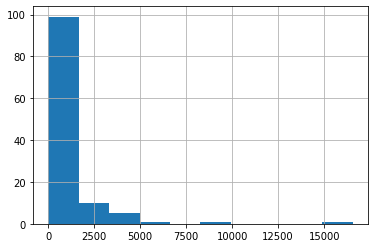

In [526]:
df_fil2_telnet.tcp_payload_size.hist()

#### http

In [66]:
df_fil2_http = df_fil2_http[(df_fil2_http.domain != 'googlebot.com')&(df_fil2_http.isp!='Googlebot')]
print(df_fil2_http.columns)
print(df_fil2_http['tcp_window_size_value_max'].value_counts())
print(df_fil2_http['country'].value_counts())
print(df_fil2_http['tcp_flags_fin'].value_counts())
print(df_fil2_http['tcp_payload_size'].value_counts())
df_fil2_http

Index(['frame_time', 'frame_time_list', 'session_duration', 'session_packets',
       'tcp_window_size_value_avg', 'tcp_window_size_value_max',
       'tcp_payload_size', 'tcp_hdr_len_sum', 'tcp_srcport', 'tcp_dstport',
       'tcp_flags_ack', 'tcp_flags_fin', 'tcp_flags_push', 'tcp_flags_reset',
       'tcp_flags_syn', 'ip_src', 'ip_dst', 'ip_ttl_avg', 'ip_ttl_max',
       'ip_proto', 'frame_protocols_common', 'frame_protocols_max',
       'frame_len_sum', 'country', 'city', 'subdivisions', 'latitude',
       'longitude', 'domain', 'isp', 'network', 'udp_length_sum',
       'udp_srcport', 'udp_dstport', 'payload_avg'],
      dtype='object')
29200.0    21177
28960.0     9208
64240.0     2780
65535.0     1756
30016.0      716
           ...  
29821.0        1
59641.0        1
47347.0        1
63719.0        1
47150.0        1
Name: tcp_window_size_value_max, Length: 1359, dtype: int64
China                  8880
United States          4153
Brazil                 3159
Russia             

frame_time                                    frame_time_list  \
30       1.578649e+09  [1578649109.863497, 1578649109.863699, 1578649...   
32       1.578585e+09  [1578585180.190318, 1578585180.190632, 1578585...   
317      1.578588e+09  [1578588218.527083, 1578588218.527403, 1578588...   
353      1.578631e+09  [1578630893.907218, 1578630893.907478, 1578630...   
411      1.578653e+09  [1578653440.546987, 1578653440.547242, 1578653...   
...               ...                                                ...   
3655315  1.578642e+09  [1578641751.357169, 1578641751.357462, 1578641...   
3655664  1.578590e+09  [1578589972.548592, 1578589972.548902, 1578589...   
3655835  1.578609e+09  [1578609479.287137, 1578609479.287381, 1578609...   
3655858  1.578660e+09  [1578660474.289039, 1578660474.289278, 1578660...   
3657305  1.578632e+09  [1578632201.07905, 1578632201.079289, 15786322...   

         session_duration  session_packets  tcp_window_size_value_avg  \
30              31.409607               28                9267.250000   
32              10.142862               11               10403.727273   
317             19.593288               12                7567.000000   
353              1.690905               10               12112.600000   
411             11.972950               24                3926.875000   
...                   ...              ...                        ...   
3655315          8.516573               14                6485.714286   
3655664         14.284335               14               15432.571429   
3655835          5.997012              374               11754.727273   
3655858         17.757830               17                8064.882353   
3657305          8.177013               14                6678.571429   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
30                         40775.0             128.0            948.0   
32                         39629.0              18.0            336.0   
317                        29200.0             515.0            356.0   
353                        29200.0             192.0            296.0   
411                        29200.0           14673.0            632.0   
...                            ...               ...              ...   
3655315                    29200.0             189.0            408.0   
3655664                    30016.0             189.0            400.0   
3655835                    29200.0          679298.0          11952.0   
3655858                    29200.0             884.0            544.0   
3657305                    29200.0             190.0            408.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
30           44497.0       8080.0           23.0            2.0   
32           26577.0         80.0            8.0            0.0   
317          27457.0         80.0            8.0            1.0   
353          12685.0         80.0            7.0            0.0   
411          27582.0         80.0           11.0            1.0   
...              ...          ...            ...            ...   
3655315      30130.0       8080.0            9.0            2.0   
3655664      54511.0       8080.0            9.0            2.0   
3655835      60739.0         80.0          371.0            0.0   
3655858       3806.0         80.0           12.0            1.0   
3657305      40023.0       8080.0            9.0            2.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn           ip_src  \
30                  8.0              3.0            8.0      1.177.63.24   
32                  2.0              2.0            4.0       1.32.25.53   
317                 2.0              2.0            4.0   103.106.32.211   
353                 1.0              2.0            5.0   103.212.91.164   
411                 2.0             11.0            4.0  103.233.122.108   
...                 ...              ...            ...              ...   
3655315

In [67]:
df_fil2_http['payload_avg'] = df_fil2_http.tcp_payload_size/df_fil2_http.session_packets
print(df_fil2_http['payload_avg'].describe())
df_fil2_http['payload_avg'].value_counts()

count    39419.000000
mean       464.308874
std        754.307524
min          0.164384
25%         21.333333
50%         51.555556
75%        828.659774
max       6088.309220
Name: payload_avg, dtype: float64


13.500000      576
13.571429      501
20.666667      501
21.692308      436
15.833333      295
              ... 
1295.000000      1
783.743243       1
3660.564110      1
2653.916667      1
1610.318895      1
Name: payload_avg, Length: 19270, dtype: int64

In [68]:
ips = df_fil2_http['ip_dst'].value_counts().index#.head(60)
values = df_fil2_http['ip_dst'].value_counts().values
df_fil2_http['ip_dst'].value_counts()

210.242.149.130    431
210.242.148.186    341
210.242.149.190    336
210.242.145.134    324
210.242.145.150    324
                  ... 
210.242.149.202      1
210.242.145.193      1
210.242.145.198      1
210.242.146.226      1
210.242.147.234      1
Name: ip_dst, Length: 1118, dtype: int64

In [457]:
a = 0
d = 0
g = 0
c = 0
for ip,value in zip(ips,values):
    value_ = int(ip.split('.')[-1])
    if value_<=63:
        a =a+value_
    elif value_ <=127:
        d = d + value_
    elif value_ <=191:
        g =g+value_
    elif value_ <=255:
        c = c+value_
    else:
        print(ip,value)

In [461]:
c/(a+d+g+c)

0.28853034077592293

In [69]:
df_fil31_http = df_fil2_http[(df_fil2_http.tcp_flags_ack>0)&(df_fil2_http.tcp_flags_fin<1)&
             (df_fil2_http.tcp_flags_push>0)&(df_fil2_http.tcp_flags_reset>0)&
            (df_fil2_http.tcp_flags_syn<1)] #沒有all null session、沒有不具ack的session、沒有不具push的session
df_fil31_http

frame_time                                    frame_time_list  \
128631   1.578644e+09             [1578643923.442245, 1578643923.442542]   
239447   1.578610e+09  [1578609585.217642, 1578609585.217944, 1578609...   
1141748  1.578644e+09             [1578644163.075075, 1578644163.075228]   
3262521  1.578599e+09  [1578598602.143856, 1578598602.144125, 1578598...   

         session_duration  session_packets  tcp_window_size_value_avg  \
128631           0.000297                2                      456.5   
239447          47.652870               50                      228.5   
1141748          0.000153                2                      730.0   
3262521          0.000777                4                      114.5   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
128631                       913.0             187.0             52.0   
239447                       457.0             342.0           1000.0   
1141748                     1460.0             233.0             52.0   
3262521                      229.0             217.0            104.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
128631       36110.0       8080.0            1.0            0.0   
239447       52419.0         80.0           25.0            0.0   
1141748       3089.0         80.0            1.0            0.0   
3262521      51640.0         80.0            2.0            0.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn           ip_src  \
128631              1.0              1.0            0.0  187.189.233.185   
239447             22.0             25.0            0.0    186.53.57.168   
1141748             1.0              1.0            0.0  212.131.143.250   
3262521             1.0              2.0            0.0      36.32.3.201   

                  ip_dst  ip_ttl_avg  ip_ttl_max ip_proto  \
128631     210.242.146.9        57.5          64        6   
239447   210.242.145.132        55.0          64        6   
1141748  210.242.148.173        57.5          64        6   
3262521  210.242.148.184        56.5          64        6   

        frame_protocols_common        frame_protocols_max  frame_len_sum  \
128631    eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:http            313   
239447    eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:http           3192   
1141748   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:http            359   
3262521   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:http            469   

         country                   city                subdivisions  latitude  \
128631    Mexico      Valle de Santiago                  Guanajuato   20.3911   
239447   Uruguay             Montevideo  Departamento de Montevideo  -34.8576   
1141748    Italy  San Giovanni la Punta                     Catania   37.5769   
3262521    China                  Hefei                       Anhui   31.8642   

         longitude            domain  \
128631   -101.1853     totalplay.net   
239447    -56.1702  anteldata.net.uy   
1141748    15.0937  telecomitalia.it   
3262521   117.2865              None   

                                                   isp           network  \
128631                                       Totalplay  187.189.232.0/22   
239447   Administracion Nacional de Telecomunicaciones     186.48.0.0/13   
1141748                        Telecom Italia Business  212.131.128.0/20   
3262521                          China Unicom Liaoning      36.32.0.0/14   

         udp_length_sum  udp_srcport  udp_dstport  payload_avg  
128631              NaN          NaN          NaN        93.50  
239447              NaN          NaN          NaN         6.84  
1141748             NaN          NaN          NaN       116.50  
3262521             NaN          NaN          NaN        54.25

In [27]:
iqr = df_fil2_http['payload_avg'].quantile(0.75)-df_fil2_http['payload_avg'].quantile(0.25)
outlier = df_fil2_http['payload_avg'].quantile(0.75) + 3*iqr
df_fil32_http = df_fil2_http[df_fil2_http['payload_avg']>outlier]
df_fil32_http

frame_time                                    frame_time_list  \
485      1.578643e+09  [1578643403.764327, 1578643403.764543, 1578643...   
1902     1.578603e+09  [1578602657.68303, 1578602657.68321, 157860265...   
2160     1.578633e+09  [1578632818.213659, 1578632818.213935, 1578632...   
13670    1.578605e+09  [1578605303.562075, 1578605303.562376, 1578605...   
24363    1.578625e+09  [1578625328.972448, 1578625328.973058, 1578625...   
...               ...                                                ...   
3635533  1.578667e+09  [1578666500.008476, 1578666500.008754, 1578666...   
3635535  1.578667e+09  [1578666905.793149, 1578666905.793525, 1578666...   
3635536  1.578668e+09  [1578667744.200543, 1578667744.200892, 1578667...   
3635538  1.578668e+09  [1578668183.313019, 1578668183.313246, 1578668...   
3635539  1.578668e+09  [1578668443.327474, 1578668443.327722, 1578668...   

         session_duration  session_packets  tcp_window_size_value_avg  \
485             33.203812             1367                1244.282370   
1902             1.302811             1002                4367.559880   
2160            18.326134             1131                2226.652520   
13670            5.930354              909               16515.609461   
24363            8.078899              657                1227.506849   
...                   ...              ...                        ...   
3635533        137.779648             1725               20392.971014   
3635535        718.064392             7239               25078.073629   
3635536        175.165298             2099               23253.182468   
3635538        139.798111             1383               23602.569053   
3635539        198.721710             2988               25281.664324   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
485                        28960.0         4545654.0          44104.0   
1902                       29200.0         3378837.0          32040.0   
2160                       29200.0         4300318.0          36304.0   
13670                      65535.0         3846987.0          29064.0   
24363                      29200.0         2760136.0          21244.0   
...                            ...               ...              ...   
3635533                    65335.0         6764933.0          34572.0   
3635535                    65335.0        24708628.0         145240.0   
3635536                    65335.0         7703284.0          42028.0   
3635538                    65335.0         4950742.0          27708.0   
3635539                    65335.0         9998585.0          61980.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
485           2676.0         80.0         1363.0            2.0   
1902         59864.0         80.0          992.0            4.0   
2160         40742.0         80.0         1130.0            2.0   
13670        63669.0         80.0          906.0            0.0   
24363        50006.0         80.0          637.0            0.0   
...              ...          ...            ...            ...   
3635533      49238.0         80.0         1722.0            5.0   
3635535      50681.0         80.0         7228.0           12.0   
3635536      51901.0         80.0         2097.0            3.0   
3635538      51962.0         80.0         1381.0            7.0   
3635539      51987.0         80.0         2986.0            2.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn          ip_src  \
485                81.0              3.0            6.0   104.223.31.75   
1902               23.0              8.0            6.0  129.28.167.192   
2160               23.0              0.0            2.0    149.56.44.47   
13670              29.0              2.0            5.0   45.115.176.98   
24363              20.0             20.0            2.0  216.244.66.239   
...                 ...              ...            ...             ...   
3635533       

In [28]:
df_fil2_http['payload_avg'].quantile(0.75) + 3*iqr

3250.6390977443607

In [511]:
df_fil32_http.session_packets.sum()

1949303

In [70]:
print(df_fil32_http.domain.value_counts())
print(df_fil32_http.isp.value_counts())
print(df_fil32_http.isp.head(20))
print(df_fil32_http.country.value_counts())
print(df_fil33_http.longitude.value_counts())
df_fil32_http.columns

linode.com                       35
cablecolor.hn                    35
amazonaws.com                    19
no-reverse-dns-configured.com    11
comcast.net                       9
                                 ..
bigpond.net.au                    1
wavecable.com                     1
tnnet.fi                          1
globenet.org                      1
starhub.net.sg                    1
Name: domain, Length: 69, dtype: int64
Gatik Business Solutions                        111
Linode                                           36
Cablecolor S.A.                                  35
Petersburg Internet Network ltd.                 33
Digital Ocean                                    23
                                               ... 
Pooya Parto Qeshm Cooperative Company             1
RCS & RDS                                         1
Rayaneh Gostar Farzanegan Ahwaz Company LTD.      1
Cox Communications                                1
Netway Internet Pvt                          

Index(['frame_time', 'frame_time_list', 'session_duration', 'session_packets',
       'tcp_window_size_value_avg', 'tcp_window_size_value_max',
       'tcp_payload_size', 'tcp_hdr_len_sum', 'tcp_srcport', 'tcp_dstport',
       'tcp_flags_ack', 'tcp_flags_fin', 'tcp_flags_push', 'tcp_flags_reset',
       'tcp_flags_syn', 'ip_src', 'ip_dst', 'ip_ttl_avg', 'ip_ttl_max',
       'ip_proto', 'frame_protocols_common', 'frame_protocols_max',
       'frame_len_sum', 'country', 'city', 'subdivisions', 'latitude',
       'longitude', 'domain', 'isp', 'network', 'udp_length_sum',
       'udp_srcport', 'udp_dstport', 'payload_avg'],
      dtype='object')

In [464]:
df_fil32_http.domain.value_counts().head(60)

cablecolor.hn                    35
linode.com                       35
amazonaws.com                    19
no-reverse-dns-configured.com    11
axntechnologies.in                9
comcast.net                       9
hwclouds-dns.com                  7
secureserver.net                  7
poneytelecom.eu                   6
shatel.ir                         6
bhn.net                           5
optonline.net                     5
rr.com                            5
btv.lv                            5
googleusercontent.com             5
ip-51-254-59.eu                   5
hinet.net                         4
vultr.com                         3
hostgator.com                     3
ip-139-99-46.eu                   3
alashadiorydshing.com             3
comcastbusiness.net               3
axc.nl                            2
suddenlink.net                    2
cox.net                           2
163data.com.cn                    2
16clouds.com                      2
iriisnetdns.com             

In [520]:
temp1 = df_fil32_http[df_fil32_http.domain =='linode.com']
temp1 = temp1.frame_time_list.tolist()
temp1 = [list(x) for x in temp1]
pickle.dump(obj=temp1,file=open('linode.com.pkl','wb'))
len(temp1)

35

In [33]:
sum(df_fil32_http.domain.isnull())

304

In [42]:
case8_lin = df_fil32_http[df_fil32_http.domain == 'linode.com']#.ip_dst.value_counts()
lin_ips = case8_lin.frame_time_list.tolist()
lin_ips = [list(x) for x in lin_ips]
pickle.dump(obj=lin_ips,file=open(pickle_dir+'case8_lin.pkl','wb'))

In [43]:
len(lin_ips)

35

In [34]:
df_fil32_http.ip_src.value_counts()

103.16.71.248      111
190.92.5.158        35
5.101.0.209         24
35.161.55.221        9
94.102.49.193        9
                  ... 
157.119.215.156      1
111.231.53.91        1
111.229.25.121       1
209.141.58.114       1
93.57.53.209         1
Name: ip_src, Length: 267, dtype: int64

In [29]:
df_fil33_http = df_fil32_http[df_fil32_http.domain =='cablecolor.hn'] #case8
df_fil33_http

frame_time                                    frame_time_list  \
2378581  1.578593e+09  [1578593481.167377, 1578593481.167756, 1578593...   
2378582  1.578594e+09  [1578593959.507858, 1578593959.508237, 1578593...   
2378584  1.578594e+09  [1578594401.224127, 1578594401.224315, 1578594...   
2378588  1.578596e+09  [1578595527.443337, 1578595527.443633, 1578595...   
2378589  1.578596e+09  [1578596020.603809, 1578596020.603991, 1578596...   
2378596  1.578599e+09  [1578599125.720052, 1578599125.720392, 1578599...   
2378603  1.578603e+09  [1578602571.476249, 1578602571.476444, 1578602...   
2378605  1.578605e+09  [1578605312.434852, 1578605312.435159, 1578605...   
2378608  1.578606e+09  [1578606183.806007, 1578606183.806203, 1578606...   
2378609  1.578606e+09  [1578606353.584504, 1578606353.584799, 1578606...   
2378610  1.578607e+09  [1578606574.73685, 1578606574.737069, 15786065...   
2378611  1.578607e+09  [1578606764.283655, 1578606764.284992, 1578606...   
2378612  1.578607e+09  [1578607372.946514, 1578607372.946804, 1578607...   
2378613  1.578608e+09  [1578608278.825563, 1578608278.825888, 1578608...   
2378615  1.578609e+09  [1578608945.888144, 1578608945.888347, 1578608...   
2378617  1.578610e+09  [1578609880.401377, 1578609880.401629, 1578609...   
2378618  1.578610e+09  [1578610245.086468, 1578610245.088062, 1578610...   
2378619  1.578611e+09  [1578610672.75328, 1578610672.753586, 15786106...   
2378620  1.578611e+09  [1578610946.867272, 1578610946.867544, 1578610...   
2378623  1.578613e+09  [1578612646.062641, 1578612646.062898, 1578612...   
2378626  1.578613e+09  [1578613470.096291, 1578613470.096508, 1578613...   
2378628  1.578614e+09  [1578614045.695069, 1578614045.695256, 1578614...   
2378632  1.578616e+09  [1578615894.506164, 1578615894.506391, 1578615...   
2378637  1.578618e+09  [1578617671.442102, 1578617671.442321, 1578617...   
2378654  1.578624e+09  [1578624388.174896, 1578624388.175372, 1578624...   
2378671  1.578630e+09  [1578630395.066673, 1578630395.067071, 1578630...   
2378684  1.578635e+09  [1578635029.784532, 1578635029.784743, 1578635...   
2378706  1.578645e+09  [1578645141.472801, 1578645141.473009, 1578645...   
2378724  1.578652e+09  [1578651680.497051, 1578651680.497392, 1578651...   
2378726  1.578652e+09  [1578652462.264429, 1578652462.26465, 15786524...   
2378745  1.578658e+09  [1578658165.974778, 1578658165.975046, 1578658...   
2378754  1.578662e+09  [1578662049.365137, 1578662049.365538, 1578662...   
2378757  1.578664e+09  [1578664119.287322, 1578664119.287653, 1578664...   
2378758  1.578664e+09  [1578664340.098345, 1578664340.098654, 1578664...   
2378778  1.578670e+09  [1578669870.451307, 1578669870.451523, 1578669...   

         session_duration  session_packets  tcp_window_size_value_avg  \
2378581          5.873320              614                3836.511401   
2378582         62.027531              596                2351.073826   
2378584          7.998980              638                2906.217868   
2378588         84.851700             1319                2759.260804   
2378589        152.940079              682                3591.335777   
2378596         16.620090              707                2138.319661   
2378603        128.491104              899                2449.322581   
2378605        140.328812             1856                3114.036638   
2378608         24.286209             1190                6663.494118   
2378609         65.885498             2994                4751.973948   
2378610         44.878056              962                3420.096674   
2378611        466.628296             6847                3100.021323   
2378612        752.293457            22504                6152.803279   
2378613        319.449341             7959                5184.735771   
2378615        528.064941             5270                2787.184820   
2378617        213.351608             5706                5368.184017   
2378618        295.181885        

In [332]:
df_fil33_http #payload avg在區間、duration在區間、packets數量在區間、protocol max一樣，

frame_time                                    frame_time_list  \
2378581  1.578593e+09  [1578593481.167377, 1578593481.167756, 1578593...   
2378582  1.578594e+09  [1578593959.507858, 1578593959.508237, 1578593...   
2378584  1.578594e+09  [1578594401.224127, 1578594401.224315, 1578594...   
2378588  1.578596e+09  [1578595527.443337, 1578595527.443633, 1578595...   
2378589  1.578596e+09  [1578596020.603809, 1578596020.603991, 1578596...   
2378596  1.578599e+09  [1578599125.720052, 1578599125.720392, 1578599...   
2378603  1.578603e+09  [1578602571.476249, 1578602571.476444, 1578602...   
2378605  1.578605e+09  [1578605312.434852, 1578605312.435159, 1578605...   
2378608  1.578606e+09  [1578606183.806007, 1578606183.806203, 1578606...   
2378609  1.578606e+09  [1578606353.584504, 1578606353.584799, 1578606...   
2378610  1.578607e+09  [1578606574.73685, 1578606574.737069, 15786065...   
2378611  1.578607e+09  [1578606764.283655, 1578606764.284992, 1578606...   
2378612  1.578607e+09  [1578607372.946514, 1578607372.946804, 1578607...   
2378613  1.578608e+09  [1578608278.825563, 1578608278.825888, 1578608...   
2378615  1.578609e+09  [1578608945.888144, 1578608945.888347, 1578608...   
2378617  1.578610e+09  [1578609880.401377, 1578609880.401629, 1578609...   
2378618  1.578610e+09  [1578610245.086468, 1578610245.088062, 1578610...   
2378619  1.578611e+09  [1578610672.75328, 1578610672.753586, 15786106...   
2378620  1.578611e+09  [1578610946.867272, 1578610946.867544, 1578610...   
2378623  1.578613e+09  [1578612646.062641, 1578612646.062898, 1578612...   
2378626  1.578613e+09  [1578613470.096291, 1578613470.096508, 1578613...   
2378628  1.578614e+09  [1578614045.695069, 1578614045.695256, 1578614...   
2378632  1.578616e+09  [1578615894.506164, 1578615894.506391, 1578615...   
2378637  1.578618e+09  [1578617671.442102, 1578617671.442321, 1578617...   
2378654  1.578624e+09  [1578624388.174896, 1578624388.175372, 1578624...   
2378671  1.578630e+09  [1578630395.066673, 1578630395.067071, 1578630...   
2378684  1.578635e+09  [1578635029.784532, 1578635029.784743, 1578635...   
2378706  1.578645e+09  [1578645141.472801, 1578645141.473009, 1578645...   
2378724  1.578652e+09  [1578651680.497051, 1578651680.497392, 1578651...   
2378726  1.578652e+09  [1578652462.264429, 1578652462.26465, 15786524...   
2378745  1.578658e+09  [1578658165.974778, 1578658165.975046, 1578658...   
2378754  1.578662e+09  [1578662049.365137, 1578662049.365538, 1578662...   
2378757  1.578664e+09  [1578664119.287322, 1578664119.287653, 1578664...   
2378758  1.578664e+09  [1578664340.098345, 1578664340.098654, 1578664...   
2378778  1.578670e+09  [1578669870.451307, 1578669870.451523, 1578669...   

         session_duration  session_packets  tcp_window_size_value_avg  \
2378581          5.873320              614                3836.511401   
2378582         62.027531              596                2351.073826   
2378584          7.998980              638                2906.217868   
2378588         84.851700             1319                2759.260804   
2378589        152.940079              682                3591.335777   
2378596         16.620090              707                2138.319661   
2378603        128.491104              899                2449.322581   
2378605        140.328812             1856                3114.036638   
2378608         24.286209             1190                6663.494118   
2378609         65.885498             2994                4751.973948   
2378610         44.878056              962                3420.096674   
2378611        466.628296             6847                3100.021323   
2378612        752.293457            22504                6152.803279   
2378613        319.449341             7959                5184.735771   
2378615        528.064941             5270                2787.184820   
2378617        213.351608             5706                5368.184017   
2378618        295.181885        

In [71]:
specificIP2 =  df[df['ip_src'] == '190.92.5.158'] #network = 213; isp = 291; domain=351;srcip=207
specificIP2_li = specificIP2.frame_time_list.tolist()
specificIP2_li = [list(x) for x in specificIP2_li]
pickle.dump(obj=specificIP2_li,file=open(pickle_dir+'case7-1.pkl','wb'))

In [142]:
hn_li = df_fil33_http.frame_time_list.tolist()
hn_li = [list(x) for x in hn_li]
hn_li

[[1578593481.167377,
  1578593481.167756,
  1578593481.41409,
  1578593481.510005,
  1578593481.510271,
  1578593481.716414,
  1578593481.716454,
  1578593481.716488,
  1578593481.716525,
  1578593481.716557,
  1578593481.963448,
  1578593481.963565,
  1578593481.963685,
  1578593481.963788,
  1578593481.963795,
  1578593481.963851,
  1578593481.96393,
  1578593481.963934,
  1578593481.963974,
  1578593481.964192,
  1578593481.964311,
  1578593481.964386,
  1578593481.964437,
  1578593481.964442,
  1578593481.964454,
  1578593481.964551,
  1578593481.964601,
  1578593481.966283,
  1578593482.210557,
  1578593482.211053,
  1578593482.211159,
  1578593482.211184,
  1578593482.211231,
  1578593482.2113,
  1578593482.211304,
  1578593482.211429,
  1578593482.211551,
  1578593482.211813,
  1578593482.211817,
  1578593482.211824,
  1578593482.211896,
  1578593482.211951,
  1578593482.211961,
  1578593482.212014,
  1578593482.231693,
  1578593482.351951,
  1578593482.352073,
  1578593482.3521

In [143]:
pickle.dump(obj=hn_li,file=open(pickle_dir+'cablecolor_hn.pkl','wb'))

In [45]:
df_fil32_http.domain.value_counts().head(20)

linode.com                       35
cablecolor.hn                    35
amazonaws.com                    19
no-reverse-dns-configured.com    11
comcast.net                       9
axntechnologies.in                9
hwclouds-dns.com                  7
secureserver.net                  7
shatel.ir                         6
poneytelecom.eu                   6
bhn.net                           5
googleusercontent.com             5
btv.lv                            5
optonline.net                     5
rr.com                            5
ip-51-254-59.eu                   5
hinet.net                         4
hostgator.com                     3
alashadiorydshing.com             3
comcastbusiness.net               3
Name: domain, dtype: int64

In [55]:
len(df_fil32_http[df_fil32_http.domain == 'linode.com'].ip_dst.value_counts())

34

case7-2
* tcp_payload_avg 在區間、session_duration 在區間、session_packets 數量在區間、frame_protocols_max一樣，

In [383]:
df.columns

Index(['frame_time', 'frame_time_list', 'session_duration', 'session_packets',
       'tcp_window_size_value_avg', 'tcp_window_size_value_max',
       'tcp_payload_size', 'tcp_hdr_len_sum', 'tcp_srcport', 'tcp_dstport',
       'tcp_flags_ack', 'tcp_flags_fin', 'tcp_flags_push', 'tcp_flags_reset',
       'tcp_flags_syn', 'ip_src', 'ip_dst', 'ip_ttl_avg', 'ip_ttl_max',
       'ip_proto', 'frame_protocols_common', 'frame_protocols_max',
       'frame_len_sum', 'country', 'city', 'subdivisions', 'latitude',
       'longitude', 'domain', 'isp', 'network', 'udp_length_sum',
       'udp_srcport', 'udp_dstport', 'udp_payload_size', 'tcp_payload_avg'],
      dtype='object')

In [514]:
df_fil33_http.payload_avg.min()

3298.827731092437

In [72]:
case72_filter1 = df[(df.frame_protocols_max == df_fil33_http.frame_protocols_max.iloc[0])&(df.tcp_dstport == df_fil33_http.tcp_dstport.iloc[0])&(df.frame_protocols_common == df_fil33_http.frame_protocols_common.iloc[0])]
case72_filter2 = case72_filter1[(case72_filter1.tcp_payload_avg<=df_fil33_http.payload_avg.max())&(case72_filter1.tcp_payload_avg>=df_fil33_http.payload_avg.min())]
case72_filter3 = case72_filter2[(case72_filter2.session_packets<=df_fil33_http.session_packets.max())&(case72_filter2.session_packets>=df_fil33_http.session_packets.min())]
case72_filter4 = case72_filter3[(case72_filter3.session_duration<=df_fil33_http.session_duration.max())&(case72_filter3.session_duration>=df_fil33_http.session_duration.min())]
case72_filter5 = case72_filter4[(case72_filter4.tcp_payload_size<=df_fil33_http.tcp_payload_size.max())&(case72_filter4.tcp_payload_size>=df_fil33_http.tcp_payload_size.min())]
case72_filter6 = case72_filter5[(case72_filter5.frame_len_sum<=df_fil33_http.frame_len_sum.max())&(case72_filter5.frame_len_sum>=df_fil33_http.frame_len_sum.min())]
case72_filter6 = case72_filter6[(case72_filter6.isp!='Googlebot')&(case72_filter6.domain != 'cablecolor.hn')&(case72_filter6.domain != 'googlebot.com')]
case72_filter6

AttributeError: 'DataFrame' object has no attribute 'tcp_payload_avg'

In [75]:
u = chr(33)+chr(126)+chr(33)+(chr(65)+chr(66)+chr(67)+chr(49)+chr(52)+chr(53)+chr(90)+chr(81)+chr(54)+chr(50)+chr(68)+chr(87)+chr(81)+chr(65)+chr(70)+chr(80)+chr(79)+chr(73)+chr(89)+chr(67)+chr(70)+chr(68))+chr(33)+chr(126)+chr(33)
u.encode('ascii')


b'!~!ABC145ZQ62DWQAFPOIYCFD!~!'

In [64]:
case72_filter6.ip_src.unique()

NameError: name 'case72_filter6' is not defined

In [63]:
df_fil33_http.frame_len_sum.max()

80271559

In [406]:
case72_ips = case72_filter6.frame_time_list.tolist()
case72_ips = [list(x) for x in case72_ips]
pickle.dump(obj=case72_ips,file=open(pickle_dir+'case7-2.pkl','wb'))
print(len(case72_ips))
# case72_ips[0]

170


In [477]:
(case72_filter6.domain.value_counts())#.head(60)

linode.com                       8
amazonaws.com                    6
no-reverse-dns-configured.com    4
btv.lv                           4
hinet.net                        4
secureserver.net                 4
ip-51-254-59.eu                  3
iriisnetdns.com                  2
comcastbusiness.net              2
ip-94-23-24.eu                   1
serv.net.mx                      1
atlanticbb.net                   1
alliancebroadband.in             1
onvol.net                        1
optonline.net                    1
telnor.net                       1
prod-dial.com.mx                 1
godns.net                        1
vultr.com                        1
quadranet.com                    1
comcast.net                      1
cizgi.net.tr                     1
ertelecom.ru                     1
prod-infinitum.com.mx            1
bacloud.info                     1
tm.net.my                        1
warpspeed1.net                   1
axntechnologies.in               1
Name: domain, dtype:

#### telnet

In [4]:
print(df_fil2_telnet.tcp_dstport.value_counts())
print(df_fil2_telnet.tcp_srcport.value_counts())
print(df_fil2_telnet.country.value_counts())
print(df_fil2_telnet.tcp_window_size_value_max.value_counts())
df_fil2_telnet.columns

23.0      114
9999.0      2
1111.0      1
Name: tcp_dstport, dtype: int64
23.0       3
3289.0     2
57230.0    1
48474.0    1
3746.0     1
          ..
57270.0    1
51892.0    1
40994.0    1
26323.0    1
47952.0    1
Name: tcp_srcport, Length: 114, dtype: int64
United States    85
Netherlands      13
China             5
Russia            4
Thailand          3
Hong Kong         2
Turkey            2
France            1
South Korea       1
Taiwan            1
Name: country, dtype: int64
28960.0    76
29200.0    34
47797.0     2
39223.0     1
30586.0     1
43883.0     1
63138.0     1
38553.0     1
Name: tcp_window_size_value_max, dtype: int64


Index(['frame_time', 'frame_time_list', 'session_duration', 'session_packets',
       'tcp_window_size_value_avg', 'tcp_window_size_value_max',
       'tcp_payload_size', 'tcp_hdr_len_sum', 'tcp_srcport', 'tcp_dstport',
       'tcp_flags_ack', 'tcp_flags_fin', 'tcp_flags_push', 'tcp_flags_reset',
       'tcp_flags_syn', 'ip_src', 'ip_dst', 'ip_ttl_avg', 'ip_ttl_max',
       'ip_proto', 'frame_protocols_common', 'frame_protocols_max',
       'frame_len_sum', 'country', 'city', 'subdivisions', 'latitude',
       'longitude', 'domain', 'isp', 'network', 'udp_length_sum',
       'udp_srcport', 'udp_dstport'],
      dtype='object')

In [5]:
df_fil31_telnet = df_fil2_telnet[df_fil2_telnet.country=='China']
df_fil31_telnet

frame_time                                    frame_time_list  \
2009569  1.578643e+09  [1578642918.977946, 1578642918.978249, 1578642...   
2612824  1.578599e+09  [1578598684.859012, 1578598684.859319, 1578598...   
2632116  1.578641e+09  [1578640962.04649, 1578640962.046947, 15786409...   
2659201  1.578635e+09  [1578634656.516247, 1578634656.516574, 1578634...   
3047375  1.578616e+09  [1578615778.703219, 1578615778.703416, 1578615...   

         session_duration  session_packets  tcp_window_size_value_avg  \
2009569         17.571102               19               11941.631579   
2612824         43.649544               22                9444.818182   
2632116          4.410262             2216                4712.223827   
2659201         34.241074               16                5247.937500   
3047375         37.421200               19                7381.473684   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
2009569                    63138.0             172.0            592.0   
2612824                    30586.0              70.0            716.0   
2632116                    29200.0             207.0          59452.0   
2659201                    29200.0              70.0            500.0   
3047375                    29200.0              70.0            608.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
2009569      48656.0         23.0           14.0            0.0   
2612824       3746.0         23.0           19.0            2.0   
2632116      33199.0         23.0          958.0            0.0   
2659201      17848.0         23.0           13.0            2.0   
3047375      35704.0         23.0           15.0            2.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn           ip_src  \
2009569             5.0              3.0            7.0     110.52.28.11   
2612824             3.0              1.0            7.0  171.124.225.159   
2632116             3.0            949.0         1261.0    202.107.226.2   
2659201             3.0              1.0            4.0       27.43.18.3   
3047375             3.0              1.0            6.0   122.234.172.58   

                 ip_dst  ip_ttl_avg  ip_ttl_max ip_proto  \
2009569  210.242.146.33   54.631579          64        6   
2612824  210.242.146.23   54.727273          64        6   
2632116  210.242.145.55   93.090253         115        6   
2659201  210.242.147.51   56.687500          64        6   
3047375  210.242.148.62   55.894737          64        6   

        frame_protocols_common          frame_protocols_max  frame_len_sum  \
2009569   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:telnet           1424   
2612824   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:telnet           1536   
2632116   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:telnet         140697   
2659201   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:telnet           1116   
3047375   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:telnet           1326   

        country       city subdivisions  latitude  longitude domain  \
2009569   China  Huangling        Hunan   27.7286   112.2756   None   
2612824   China    Huozhou       Shanxi   36.5756   111.7186   None   
2632116   China       None     Zhejiang   30.2940   120.1619   None   
2659201   China  Guangzhou    Guangdong   23.1167   113.2500   None   
3047375   China   Hangzhou     Zhejiang   30.2940   120.1619   None   

                            isp           network  udp_length_sum  \
2009569   China Unicom Liaoning     110.52.0.0/15             NaN   
2612824   China Unicom Liaoning    171.120.0.0/13             NaN   
2632116           China Telecom  202.107.226.0/24             NaN   
2659201  China Unicom Guangdong      27.42.0.0/15             NaN   
3047375           China Telecom    122.232.0.0/14             NaN   

         udp_srcport  udp_dstport  
2009569          NaN          NaN  
2612824          NaN          NaN  
2632116          NaN          NaN  


In [96]:
df_fil2_telnet.tcp_payload_size.astype(int).sort_values(ascending=True).head()#.describe()

538565     12
2660377    33
2660380    36
2422445    36
1864163    36
Name: tcp_payload_size, dtype: int64

In [8]:
total_size_q3 = df_fil2_telnet.tcp_payload_size.quantile(0.75)
total_size_iqr = df_fil2_telnet.tcp_payload_size.quantile(0.75) - df_fil2_telnet.tcp_payload_size.quantile(0.25)
total_size_q3 + 3*total_size_iqr

930.0

In [10]:
len(df_fil32_telnet)

20

In [9]:
df_fil32_telnet = df_fil2_telnet[df_fil2_telnet.tcp_payload_size>total_size_q3 + 3*total_size_iqr]
df_fil32_telnet

frame_time                                    frame_time_list  \
633275   1.578636e+09  [1578636262.320167, 1578636263.319424, 1578636...   
633276   1.578646e+09  [1578645813.079108, 1578645813.079411, 1578645...   
633277   1.578657e+09  [1578656831.159723, 1578656832.15703, 15786568...   
867381   1.578602e+09  [1578601972.597436, 1578601973.597651, 1578601...   
867382   1.578648e+09  [1578647689.059387, 1578647690.057787, 1578647...   
867383   1.578653e+09  [1578652825.911964, 1578652826.908352, 1578652...   
1258542  1.578670e+09  [1578669846.56746, 1578669846.567756, 15786698...   
1440681  1.578604e+09  [1578604236.737921, 1578604236.738179, 1578604...   
1440683  1.578637e+09  [1578637291.336219, 1578637291.336505, 1578637...   
1686093  1.578604e+09  [1578604429.312455, 1578604430.311969, 1578604...   
1686094  1.578627e+09  [1578626910.359275, 1578626910.359527, 1578626...   
3105694  1.578596e+09  [1578596035.339088, 1578596036.338618, 1578596...   
3159936  1.578659e+09  [1578659247.869941, 1578659247.897415, 1578659...   
3159937  1.578660e+09  [1578660350.907513, 1578660350.907778, 1578660...   
3159938  1.578661e+09  [1578660636.685233, 1578660636.685523, 1578660...   
3159939  1.578668e+09  [1578667814.566142, 1578667814.952947, 1578667...   
3159940  1.578669e+09  [1578668591.107448, 1578668591.248278, 1578668...   
3159941  1.578670e+09  [1578669552.546449, 1578669552.546746, 1578669...   
3159942  1.578671e+09  [1578670877.014678, 1578670877.014914, 1578670...   
3414842  1.578646e+09  [1578645822.355013, 1578645822.355284, 1578645...   

         session_duration  session_packets  tcp_window_size_value_avg  \
633275          93.726486              128                8768.593750   
633276          83.967834              118                8768.169492   
633277          72.561554              106                8917.132075   
867381          76.074791              124                9044.282258   
867382          88.146652              125                8510.104000   
867383          77.337296              130                8637.030769   
1258542         81.616371              123                8880.463415   
1440681         98.172478              117                9577.128205   
1440683        145.548737              130                8664.553846   
1686093         72.654480              111                8273.108108   
1686094         85.875153              107                8836.056075   
3105694         33.191792               22               10709.863636   
3159936        496.361328              752                6320.271277   
3159937         45.849380              131                7272.198473   
3159938         36.138351              143                6474.937063   
3159939         40.624912              100                8308.000000   
3159940         37.208893              177                6410.824859   
3159941         46.061081              134                6462.925373   
3159942        204.840820              466                6410.866953   
3414842        293.671021             1589                5149.287602   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
633275                     29200.0            3638.0           4328.0   
633276                     29200.0            1844.0           3984.0   
633277                     29200.0            2824.0           3576.0   
867381                     29200.0            2749.0           4188.0   
867382                     29200.0            3288.0           4228.0   
867383                     29200.0            3843.0           4404.0   
1258542                    29200.0            3012.0           4148.0   
1440681                    29200.0            3522.0           4012.0   
1440683                    29200.0            3892.0           4304.0   
1686093                    29200.0            3796.0           3776.0   
1686094                    29200.0            2872.0           3596.0   
3105

In [21]:
df[(df.tcp_payload_size>0) | (df.udp_length_sum>0)]

frame_time                                    frame_time_list  \
30       1.578649e+09  [1578649109.863497, 1578649109.863699, 1578649...   
32       1.578585e+09  [1578585180.190318, 1578585180.190632, 1578585...   
43       1.578632e+09  [1578631557.799882, 1578631557.80014, 15786315...   
44       1.578633e+09  [1578632889.440845, 1578632889.4411, 157863288...   
45       1.578634e+09  [1578633890.715757, 1578633890.715946, 1578633...   
...               ...                                                ...   
3657441  1.578597e+09  [1578596881.66265, 1578596881.662906, 15785968...   
3657442  1.578599e+09  [1578599214.30334, 1578599214.303662, 15785992...   
3657443  1.578612e+09  [1578612313.542045, 1578612313.54239, 15786123...   
3657444  1.578662e+09  [1578661694.664382, 1578661694.664655, 1578661...   
3657445  1.578663e+09  [1578663231.137809, 1578663231.138045, 1578663...   

         session_duration  session_packets  tcp_window_size_value_avg  \
30              31.409607               28                9267.250000   
32              10.142862               11               10403.727273   
43               0.078752                6               11877.000000   
44               0.086202                6               11877.000000   
45               0.088153                6               11877.000000   
...                   ...              ...                        ...   
3657441          1.071184               15                4078.600000   
3657442          1.063198               15                4078.600000   
3657443          1.691539               15                4078.600000   
3657444          1.089129               15                4078.600000   
3657445          1.204707               15                4078.600000   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
30                         40775.0             128.0            948.0   
32                         39629.0              18.0            336.0   
43                         29200.0             192.0            144.0   
44                         29200.0             194.0            144.0   
45                         29200.0             194.0            144.0   
...                            ...               ...              ...   
3657441                    29200.0            1110.0            496.0   
3657442                    29200.0            1110.0            496.0   
3657443                    29200.0            1110.0            496.0   
3657444                    29200.0            1110.0            496.0   
3657445                    29200.0            1110.0            496.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
30           44497.0       8080.0           23.0            2.0   
32           26577.0         80.0            8.0            0.0   
43            1070.0       1433.0            5.0            0.0   
44            1070.0       1433.0            5.0            0.0   
45            1070.0       1433.0            5.0            0.0   
...              ...          ...            ...            ...   
3657441      50878.0         22.0           14.0            2.0   
3657442      56742.0         22.0           14.0            2.0   
3657443      43838.0         22.0           14.0            2.0   
3657444      49664.0         22.0           14.0            2.0   
3657445      35708.0         22.0           14.0            2.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn          ip_src  \
30                  8.0              3.0            8.0     1.177.63.24   
32                  2.0              2.0            4.0      1.32.25.53   
43                  1.0              1.0            2.0      1.55.108.5   
44                  1.0              1.0            2.0      1.55.108.5   
45                  1.0              1.0            2.0      1.55.108.5   
...                 ...              ...            ...             ...   
3657441       

In [22]:
916601/3609139

0.25396666628799835

In [23]:
len(df.frame_protocols_max.unique())

371

In [11]:
df_fil32_telnet.session_packets.sum()

4833

In [147]:
telnet_li = df_fil32_telnet.frame_time_list.tolist()
telnet_li = [list(x) for x in telnet_li]
telnet_li

[[1578636262.320167,
  1578636263.319424,
  1578636263.319698,
  1578636263.510431,
  1578636263.510538,
  1578636263.987404,
  1578636264.551462,
  1578636264.733566,
  1578636264.925367,
  1578636265.683414,
  1578636265.683726,
  1578636267.32023,
  1578636267.357739,
  1578636270.616029,
  1578636270.616301,
  1578636270.807215,
  1578636270.807326,
  1578636271.29138,
  1578636271.867367,
  1578636272.133609,
  1578636272.324545,
  1578636273.023376,
  1578636274.333521,
  1578636274.524449,
  1578636275.331366,
  1578636275.616067,
  1578636278.533567,
  1578636278.724451,
  1578636279.676721,
  1578636279.676998,
  1578636279.685537,
  1578636279.867733,
  1578636279.876312,
  1578636279.955404,
  1578636284.676773,
  1578636284.677227,
  1578636286.533419,
  1578636286.724371,
  1578636288.475206,
  1578636288.475441,
  1578636288.651352,
  1578636288.651432,
  1578636288.651663,
  1578636289.187468,
  1578636292.285327,
  1578636292.475854,
  1578636293.47528,
  1578636293.513

In [148]:
pickle.dump(obj=telnet_li,file=open(pickle_dir+'telnet_large.pkl','wb')) #case8

In [76]:
df[(df.ip_src == '92.119.160.30') &(df.frame_protocols_max != df_fil32_telnet.frame_protocols_max.iloc[0])]

frame_time                                    frame_time_list  \
159614   1.578645e+09  [1578644740.302492, 1578644740.302734, 1578644...   
628971   1.578644e+09  [1578644366.656285, 1578644366.656418, 1578644...   
1071713  1.578645e+09  [1578645465.340109, 1578645465.340409, 1578645...   
1770618  1.578645e+09  [1578645458.402274, 1578645458.402523, 1578645...   
1973009  1.578646e+09  [1578646336.172329, 1578646336.172642, 1578646...   
2734206  1.578646e+09  [1578645808.386759, 1578645808.386967, 1578645...   
2935840  1.578646e+09  [1578645821.096135, 1578645821.096407, 1578645...   

         session_duration  session_packets  tcp_window_size_value_avg  \
159614         249.409821             2013                5470.963736   
628971         113.480301              606                5303.471947   
1071713        381.283447             2689                5945.650428   
1770618        388.214233             2546                5388.963079   
1973009        482.134186             2620                5652.979008   
2734206        330.571716             2842                5744.027797   
2935840        337.256042             3913                4975.634807   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
159614                     29200.0           21605.0          53460.0   
628971                     29200.0            5392.0          15968.0   
1071713                    29200.0           38332.0          72120.0   
1770618                    29200.0           21877.0          67728.0   
1973009                    29200.0           30535.0          69020.0   
2734206                    29200.0           28882.0          74640.0   
2935840                    29200.0           34248.0         100040.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
159614       62452.0         25.0         1311.0            0.0   
628971       64949.0       5168.0          412.0           17.0   
1071713      64673.0       2555.0         1898.0            0.0   
1770618      62408.0       1581.0         1691.0           58.0   
1973009      64456.0       5554.0         1842.0            0.0   
2734206      63813.0       3628.0         2012.0           59.0   
2935840      63882.0         21.0         2773.0            1.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn         ip_src  \
159614            465.0            170.0          991.0  92.119.160.30   
628971            131.0             59.0          276.0  92.119.160.30   
1071713           617.0            198.0         1276.0  92.119.160.30   
1770618           521.0            235.0         1217.0  92.119.160.30   
1973009           624.0            217.0         1213.0  92.119.160.30   
2734206           671.0            270.0         1247.0  92.119.160.30   
2935840           748.0            464.0         1731.0  92.119.160.30   

                 ip_dst  ip_ttl_avg  ip_ttl_max ip_proto  \
159614   210.242.147.20  104.346746         118        6   
628971   210.242.147.18  102.681518         118        6   
1071713  210.242.146.12  103.493120         118        6   
1770618  210.242.149.45  103.402200         118        6   
1973009  210.242.149.17  103.283206         118        6   
2734206  210.242.146.54  102.591133         118        6   
2935840  210.242.149.13   98.773320         118        6   

        frame_protocols_common        frame_protocols_max  frame_len_sum  \
159614    eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:smtp         144165   
628971    eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:data          42296   
1071713   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:data         202538   
1770618   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:data         177339   
1973009   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:data         189505   
2734206   eth:ethertype:ip:tcp  eth:ethertype:ip:tcp:data         201550   
2935840   eth:ethertype:ip:tcp   eth:ethertype:ip:tcp:ftp         271344   

        coun

In [89]:
print(df[(df.ip_src == '92.246.76.84')].frame_protocols_max.unique())
print(df[(df.ip_src == '198.108.67.48')].frame_protocols_max.unique())


['eth:ethertype:ip:tcp:data' 'eth:ethertype:ip:tcp'
 'eth:ethertype:ip:tcp:ftp-data'
 'eth:ethertype:ip:tcp:ftp-data:data-text-lines'
 'eth:ethertype:ip:tcp:ftp' 'eth:ethertype:ip:tcp:nntp'
 'eth:ethertype:ip:tcp:smtp' 'eth:ethertype:ip:tcp:telnet'
 'eth:ethertype:ip:tcp:snmp' 'eth:ethertype:ip:tcp:chargen'
 'eth:ethertype:ip:tcp:rpc' 'eth:ethertype:ip:tcp:tacplus'
 'eth:ethertype:ip:tcp:gopher' 'eth:ethertype:ip:tcp:time'
 'eth:ethertype:ip:tcp:kerberos' 'eth:ethertype:ip:tcp:daytime'
 'eth:ethertype:ip:tcp:finger' 'eth:ethertype:ip:tcp:pop:imf'
 'eth:ethertype:ip:tcp:tpkt:cotp:rdp']
['eth:ethertype:ip:tcp:sip' 'eth:ethertype:ip:tcp'
 'eth:ethertype:ip:tcp:http' 'eth:ethertype:ip:tcp:gsm_ipa:gsm_abis_rsl'
 'eth:ethertype:ip:tcp:mysql' 'eth:ethertype:ip:tcp:ftp'
 'eth:ethertype:ip:tcp:ssl' 'eth:ethertype:ip:tcp:gsm_ipa'
 'eth:ethertype:ip:tcp:imap:ssl' 'eth:ethertype:ip:tcp:imap'
 'eth:ethertype:ip:tcp:socks' 'eth:ethertype:ip:tcp:data'
 'eth:ethertype:ip:tcp:telnet' 'eth:ethertype:ip:

In [81]:
one = set(df[df.frame_protocols_max == 'eth:ethertype:ip:tcp:ftp'].ip_src.unique())
two = set(df[df.frame_protocols_max == 'eth:ethertype:ip:tcp:smtp'].ip_src.unique())
three = set(df[df.frame_protocols_max == 'eth:ethertype:ip:tcp:data'].ip_src.unique())
four = set(df[df.frame_protocols_max == 'eth:ethertype:ip:tcp:telnet'].ip_src.unique())

In [87]:
temp = set.intersection(one,two,three,four)
temp

{'107.6.171.130',
 '194.61.24.75',
 '198.108.67.48',
 '198.143.158.82',
 '202.107.226.2',
 '92.119.160.30',
 '92.246.76.84'}

In [88]:
for ip in temp:
    print(ip,len(df[(df.ip_src == ip)].frame_protocols_max.unique()))

92.246.76.84 19
107.6.171.130 23
194.61.24.75 12
202.107.226.2 53
198.143.158.82 15
92.119.160.30 4
198.108.67.48 19


In [106]:
df[df.ip_src == '184.154.47.2'].tcp_dstport.unique()

array([1.7230e+03, 5.0000e+03, 5.0010e+03, 2.1000e+01, 2.3000e+01,
       8.2000e+01, 2.2220e+03,        nan, 4.6500e+02, 2.0830e+03,
       3.7777e+04, 5.5400e+02, 8.0800e+03, 8.1000e+01, 4.4500e+02,
       8.0000e+03, 9.9500e+02, 1.4300e+02, 2.5000e+01, 7.5470e+03,
       2.0870e+03, 8.0900e+03, 9.0000e+03, 1.1000e+02, 9.9300e+02,
       8.0000e+01, 5.9000e+03, 4.5670e+03])

In [107]:
for i in df[df.ip_src == '184.154.47.2'].tcp_dstport.unique():
    print(i)

1723.0
5000.0
5001.0
21.0
23.0
82.0
2222.0
nan
465.0
2083.0
37777.0
554.0
8080.0
81.0
445.0
8000.0
995.0
143.0
25.0
7547.0
2087.0
8090.0
9000.0
110.0
993.0
80.0
5900.0
4567.0


In [91]:
temp = df[df.ip_src == '92.246.76.84'].frame_time_list.tolist()
temp = [list(x) for x in temp]

frame_time                                    frame_time_list  \
33316    1.578667e+09  [1578666665.463157, 1578666665.463422, 1578666...   
33317    1.578670e+09  [1578669831.174152, 1578669831.174454, 1578669...   
51616    1.578662e+09  [1578662397.292927, 1578662397.293214, 1578662...   
51617    1.578665e+09  [1578665269.695458, 1578665269.695682, 1578665...   
51618    1.578667e+09  [1578667426.544509, 1578667426.544822, 1578667...   
...               ...                                                ...   
3637614  1.578663e+09  [1578662504.825438, 1578662504.825675, 1578662...   
3637615  1.578665e+09  [1578665268.653977, 1578665268.654175, 1578665...   
3637616  1.578667e+09  [1578667402.925291, 1578667402.925494, 1578667...   
3655833  1.578667e+09  [1578666774.53289, 1578666774.533242, 15786667...   
3655834  1.578665e+09  [1578664510.066178, 1578664510.066485, 1578664...   

         session_duration  session_packets  tcp_window_size_value_avg  \
33316           12.053482                9                3409.444444   
33317           16.871819               10                3068.700000   
51616           57.892212               22                8100.000000   
51617           10.079602                7                4322.571429   
51618           30.414402               21                7098.000000   
...                   ...              ...                        ...   
3637614         11.029255                9                3409.444444   
3637615          8.111200                7                4322.571429   
3637616         71.688065               14                4322.571429   
3655833         19.429306               16                5630.312500   
3655834         11.673620                7                4322.571429   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
33316                      29200.0              49.0            204.0   
33317                      29200.0              96.0            224.0   
51616                      29200.0             376.0            584.0   
51617                      29200.0             247.0            164.0   
51618                      29200.0             529.0            540.0   
...                            ...               ...              ...   
3637614                    29200.0              49.0            204.0   
3637615                    29200.0             247.0            164.0   
3637616                    29200.0             494.0            328.0   
3655833                    29200.0             190.0            392.0   
3655834                    29200.0             247.0            164.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
33316          251.0       1111.0            8.0            1.0   
33317          251.0       8080.0            8.0            1.0   
51616           14.0       1111.0           21.0            0.0   
51617          390.0       9999.0            6.0            0.0   
51618          390.0       9999.0           20.0            0.0   
...              ...          ...            ...            ...   
3637614        225.0       1111.0            8.0            1.0   
3637615        225.0       9999.0            6.0            0.0   
3637616        225.0       9999.0           12.0            0.0   
3655833          6.0       8080.0           15.0            1.0   
3655834        117.0       9999.0            6.0            0.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn        ip_src  \
33316               2.0              1.0            2.0  92.246.76.84   
33317               3.0              2.0            2.0  92.246.76.84   
51616               8.0              1.0            7.0  92.246.76.84   
51617               2.0              1.0            2.0  92.246.76.84   
51618               8.0              1.0            6.0  92.246.76.84   
...                 ...              ...            ...           ...   
3637614             2.0     

In [154]:
print(df_fil32_telnet.isp.value_counts())
print(df_fil32_telnet.country.value_counts())
df_fil32_telnet.domain.value_counts()

SingleHop LLC    12
ERA LLC           7
Mosnet LLC        1
Name: isp, dtype: int64
Netherlands      13
United States     6
Russia            1
Name: country, dtype: int64


sgded.com         5
singlehop.net     4
si-servers.com    2
stablehost.com    1
Name: domain, dtype: int64

In [157]:
print(df_fil2_telnet.tcp_flags_reset.value_counts())
print(df_fil2_telnet.ip_src.value_counts())


1.0      31
2.0      27
3.0      18
4.0      10
6.0       8
8.0       5
7.0       5
5.0       3
10.0      2
0.0       2
124.0     1
31.0      1
15.0      1
9.0       1
48.0      1
949.0     1
Name: tcp_flags_reset, dtype: int64
52.53.160.150      10
54.193.91.151       9
52.12.112.22        8
34.221.216.151      8
54.219.167.81       8
52.24.140.143       7
194.61.24.75        7
54.153.91.4         7
13.57.246.146       7
52.43.210.209       6
34.220.212.39       6
107.6.171.130       3
184.154.47.2        3
198.108.67.48       3
101.108.36.122      2
92.246.76.84        2
198.143.158.82      2
223.197.136.59      2
107.6.183.226       2
193.248.227.243     1
125.26.159.177      1
202.107.226.2       1
171.124.225.159     1
210.242.252.80      1
27.43.18.3          1
110.52.28.11        1
198.143.133.154     1
119.207.54.84       1
122.234.172.58      1
92.246.76.80        1
107.6.169.250       1
88.228.241.74       1
46.1.131.182        1
92.119.160.30       1
Name: ip_src, dtype: int

In [160]:

df_fil2_telnet[df_fil2_telnet.ip_src == '52.53.160.150']

frame_time                                    frame_time_list  \
1877345  1.578647e+09  [1578646724.245472, 1578646725.253125, 1578646...   
1877346  1.578647e+09  [1578647090.190099, 1578647091.201812, 1578647...   
1877347  1.578647e+09  [1578647270.136636, 1578647271.138317, 1578647...   
1877348  1.578647e+09  [1578647441.822432, 1578647441.822686, 1578647...   
1877349  1.578648e+09  [1578647810.88215, 1578647810.882429, 15786478...   
1877350  1.578648e+09  [1578648005.776439, 1578648005.776764, 1578648...   
1877351  1.578648e+09  [1578648313.12914, 1578648313.129436, 15786483...   
1877352  1.578649e+09  [1578648627.738603, 1578648628.767366, 1578648...   
1877353  1.578649e+09  [1578648927.37634, 1578648927.376568, 15786489...   
1877354  1.578649e+09  [1578649179.576754, 1578649179.576956, 1578649...   

         session_duration  session_packets  tcp_window_size_value_avg  \
1877345         50.595753               40                7234.325000   
1877346         53.152477               44                7849.522727   
1877347         33.930321               22               10277.954545   
1877348        226.274506               67                7339.835821   
1877349         60.166389               52                6672.153846   
1877350        160.014175               46                8141.347826   
1877351        107.637489               34                6843.705882   
1877352         29.797939               21                9487.238095   
1877353         75.838753               23                6266.000000   
1877354         14.222524               17                6843.705882   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
1877345                    28960.0             132.0           1348.0   
1877346                    28960.0             117.0           1468.0   
1877347                    28960.0              48.0            756.0   
1877348                    28960.0             213.0           2232.0   
1877349                    28960.0             171.0           1712.0   
1877350                    28960.0             108.0           1540.0   
1877351                    28960.0             114.0           1128.0   
1877352                    28960.0              48.0            716.0   
1877353                    28960.0              84.0            752.0   
1877354                    28960.0              57.0            564.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
1877345      32902.0         23.0           35.0            2.0   
1877346      55818.0         23.0           37.0            5.0   
1877347      42810.0         23.0           17.0            3.0   
1877348      45142.0         23.0           58.0            7.0   
1877349      53356.0         23.0           44.0            4.0   
1877350      60902.0         23.0           39.0            3.0   
1877351      59180.0         23.0           30.0            2.0   
1877352      42242.0         23.0           17.0            3.0   
1877353      55264.0         23.0           19.0            2.0   
1877354      54348.0         23.0           15.0            1.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn         ip_src  \
1877345            15.0              2.0           10.0  52.53.160.150   
1877346            16.0              3.0           12.0  52.53.160.150   
1877347             8.0              1.0            8.0  52.53.160.150   
1877348            25.0              4.0           17.0  52.53.160.150   
1877349            18.0              4.0           12.0  52.53.160.150   
1877350            18.0              3.0           13.0  52.53.160.150   
1877351            12.0              2.0            8.0  52.53.160.150   
1877352             8.0              1.0            7.0  52.53.160.150   
1877353             7.0              2.0            5.0  52.53.160.150   
1877354             6.0              1.0            4.0  52.53.160.150   

             

In [62]:
for time_stamp in df_fil3_telnet.iloc[3,1]:
    print(time_stamp)

1578642918.977946
1578642918.978249
1578642919.032568
1578642919.566445
1578642919.566717
1578642919.622935
1578642920.95527
1578642921.0051
1578642922.955545
1578642923.010031
1578642927.355486
1578642927.405955
1578642934.486774
1578642934.727788
1578642934.986633
1578642935.505787
1578642935.506057
1578642936.548728
1578642936.549049


ssh

In [230]:
df_fil2.columns

Index(['frame_time', 'frame_time_list', 'session_duration', 'session_packets',
       'tcp_window_size_value_avg', 'tcp_window_size_value_max',
       'tcp_payload_size', 'tcp_hdr_len_sum', 'tcp_srcport', 'tcp_dstport',
       'tcp_flags_ack', 'tcp_flags_fin', 'tcp_flags_push', 'tcp_flags_reset',
       'tcp_flags_syn', 'ip_src', 'ip_dst', 'ip_ttl_avg', 'ip_ttl_max',
       'ip_proto', 'frame_protocols_common', 'frame_protocols_max',
       'frame_len_sum', 'country', 'city', 'subdivisions', 'latitude',
       'longitude', 'domain', 'isp', 'network', 'udp_length_sum',
       'udp_srcport', 'udp_dstport', 'udp_payload_size'],
      dtype='object')

In [237]:
df_fil2_ssh = df_fil2[df_fil2.frame_protocols_max.str.contains('ssh')]
print(df_fil2_ssh.describe())
df_fil3_ssh = df_fil2_ssh[(df_fil2_ssh.session_packets>15) & (df_fil2_ssh.session_duration>1)] #duration packets
df_fil3_ssh

         frame_time  session_duration  session_packets  \
count  7.413700e+04      74137.000000     7.413700e+04   
mean   1.578627e+09         22.877144     1.128014e+02   
std    2.462553e+04        333.744720     1.263604e+04   
min    1.578585e+09          0.000000     1.000000e+00   
25%    1.578606e+09          0.528969     1.500000e+01   
50%    1.578626e+09          1.403954     1.500000e+01   
75%    1.578648e+09          3.135409     1.800000e+01   
max    1.578671e+09      78570.960938     3.426272e+06   

       tcp_window_size_value_avg  tcp_window_size_value_max  tcp_payload_size  \
count               74137.000000               74137.000000      7.413700e+04   
mean                 3964.652190               30233.084236      1.118940e+04   
std                  2266.939498                6039.324615      1.161119e+06   
min                   106.500000                 213.000000      2.100000e+01   
25%                  3094.400000               29200.000000      1.11000

frame_time                                    frame_time_list  \
321      1.578608e+09  [1578607551.649265, 1578607551.649532, 1578607...   
548      1.578631e+09  [1578631296.965188, 1578631296.965508, 1578631...   
549      1.578654e+09  [1578654378.640525, 1578654378.640763, 1578654...   
559      1.578617e+09  [1578617145.808371, 1578617145.808672, 1578617...   
560      1.578648e+09  [1578648083.543228, 1578648083.543432, 1578648...   
...               ...                                                ...   
3654884  1.578647e+09  [1578646817.462863, 1578646817.463054, 1578646...   
3655010  1.578599e+09  [1578598777.734749, 1578598777.735001, 1578598...   
3655270  1.578638e+09  [1578638087.986015, 1578638087.986299, 1578638...   
3655271  1.578654e+09  [1578654290.368299, 1578654290.368604, 1578654...   
3655318  1.578615e+09  [1578614903.343053, 1578614903.343336, 1578614...   

         session_duration  session_packets  tcp_window_size_value_avg  \
321              6.639598               25                4076.360000   
548             74.656830               32                3838.437500   
549            192.470734               51                2493.901961   
559            121.353394               38                4804.842105   
560             15.157405               18               11495.500000   
...                   ...              ...                        ...   
3654884          2.594299               18                6643.333333   
3655010          4.408138               20               10270.750000   
3655270         80.050743               30                4078.600000   
3655271         13.424419               16                3838.500000   
3655318         30.628519               30                3059.666667   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
321                        29200.0            2856.0            524.0   
548                        29200.0            2220.0           1056.0   
549                        29200.0            6840.0           1688.0   
559                        29200.0            1382.0            892.0   
560                        29200.0             145.0            480.0   
...                            ...               ...              ...   
3654884                    29200.0            1247.0            608.0   
3655010                    29200.0            1110.0            696.0   
3655270                    29200.0            2220.0            992.0   
3655271                    29200.0            1110.0            528.0   
3655318                    28960.0            2220.0            992.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
321          47467.0         22.0           24.0            2.0   
548          45102.0         22.0           30.0            5.0   
549          45622.0         22.0           49.0           17.0   
559          51413.0         22.0           35.0            5.0   
560          49582.0         22.0           15.0            3.0   
...              ...          ...            ...            ...   
3654884      36296.0         22.0           16.0            2.0   
3655010      60032.0         22.0           17.0            2.0   
3655270      36511.0         22.0           28.0            4.0   
3655271      53166.0         22.0           15.0            2.0   
3655318      45393.0         22.0           28.0            4.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn           ip_src  \
321                11.0              0.0            2.0  103.126.247.241   
548                10.0              0.0            4.0     106.13.67.90   
549                24.0              0.0            4.0     106.13.67.90   
559                17.0              0.0            6.0   106.52.234.191   
560                 5.0              0.0            7.0   106.52.234.191   
...                 ...              ...            ...              ...   
3654884

In [249]:
print(df_fil3_ssh.ip_src.value_counts())
print(df_fil3_ssh.tcp_srcport.value_counts())
df_fil3_ssh[df_fil3_ssh.ip_src == '109.236.91.85']
df_fil4_ssh = df_fil3_ssh[df_fil3_ssh.tcp_srcport == 9224]
df_fil4_ssh


109.236.91.85      184
193.188.22.229     181
192.169.219.226    164
192.34.62.227      119
193.188.22.188     114
                  ... 
111.204.157.197      1
159.65.183.47        1
129.28.97.252        1
177.93.65.238        1
171.224.174.37       1
Name: ip_src, Length: 6209, dtype: int64
9224.0     139
23846.0     21
57096.0     21
56840.0     18
24841.0     17
          ... 
34980.0      1
58886.0      1
54706.0      1
8060.0       1
43008.0      1
Name: tcp_srcport, Length: 14064, dtype: int64


frame_time                                    frame_time_list  \
30291    1.578591e+09  [1578590650.778374, 1578590650.778674, 1578590...   
30292    1.578593e+09  [1578592506.792357, 1578592506.792656, 1578592...   
30293    1.578594e+09  [1578594316.368935, 1578594316.369331, 1578594...   
30294    1.578595e+09  [1578594629.25307, 1578594629.253357, 15785946...   
30295    1.578627e+09  [1578626787.634216, 1578626787.634383, 1578626...   
...               ...                                                ...   
3633683  1.578646e+09  [1578645753.346058, 1578645753.346303, 1578645...   
3633684  1.578646e+09  [1578646498.62117, 1578646498.621432, 15786464...   
3633685  1.578647e+09  [1578647031.198671, 1578647031.199013, 1578647...   
3633686  1.578654e+09  [1578654206.36356, 1578654206.363954, 15786542...   
3649992  1.578638e+09  [1578637684.340953, 1578637684.341386, 1578637...   

         session_duration  session_packets  tcp_window_size_value_avg  \
30291            6.587474               28               31221.892857   
30292            5.834913               28               31221.892857   
30293            6.115505               28               31221.892857   
30294            6.224747               28               31221.892857   
30295           11.729493               30               31273.233333   
...                   ...              ...                        ...   
3633683          1.668933               28                1676.928571   
3633684          1.681339               28                1676.928571   
3633685          1.734745               28                1676.928571   
3633686         14.464881               24                1932.500000   
3649992         34.196350               28                2416.321429   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
30291                      32928.0            2872.0            568.0   
30292                      32928.0            2872.0            568.0   
30293                      32928.0            2872.0            568.0   
30294                      32928.0            2872.0            568.0   
30295                      32928.0            2872.0            608.0   
...                            ...               ...              ...   
3633683                    28960.0            2856.0            912.0   
3633684                    28960.0            2856.0            912.0   
3633685                    28960.0            2856.0            912.0   
3633686                    28960.0            2636.0            784.0   
3649992                    28960.0            3062.0            924.0   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
30291         9224.0         22.0           27.0            2.0   
30292         9224.0         22.0           27.0            2.0   
30293         9224.0         22.0           27.0            2.0   
30294         9224.0         22.0           27.0            2.0   
30295         9224.0         22.0           29.0            2.0   
...              ...          ...            ...            ...   
3633683       9224.0         22.0           27.0            2.0   
3633684       9224.0         22.0           27.0            2.0   
3633685       9224.0         22.0           27.0            2.0   
3633686       9224.0         22.0           23.0            2.0   
3649992       9224.0         22.0           27.0            2.0   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn        ip_src  \
30291              12.0              0.0            2.0  5.88.155.130   
30292              12.0              0.0            2.0  5.88.155.130   
30293              12.0              0.0            2.0  5.88.155.130   
30294              12.0              0.0            2.0  5.88.155.130   
30295              12.0              0.0            2.0  5.88.155.130   
...                 ...              ...            ...           ...   
3633683            12.0     

In [250]:
case9_li = df_fil4_ssh.frame_time_list.tolist()
case9_li = [list(x) for x in case9_li]
pickle.dump(obj=case9_li,file=open(pickle_dir+'ssh_srcport.pkl','wb'))
case9_li

[[1578590650.778374,
  1578590650.778674,
  1578590651.079908,
  1578590651.079943,
  1578590651.080239,
  1578590651.084377,
  1578590651.385742,
  1578590651.386045,
  1578590651.423033,
  1578590651.724161,
  1578590651.724392,
  1578590651.729712,
  1578590652.067834,
  1578590652.956224,
  1578590652.964835,
  1578590653.266293,
  1578590655.113665,
  1578590655.150396,
  1578590655.451539,
  1578590655.451681,
  1578590655.453094,
  1578590655.754228,
  1578590655.754241,
  1578590655.794466,
  1578590656.759644,
  1578590657.060827,
  1578590657.064705,
  1578590657.365848],
 [1578592506.792357,
  1578592506.792656,
  1578592507.086254,
  1578592507.08629,
  1578592507.086447,
  1578592507.09034,
  1578592507.384164,
  1578592507.384545,
  1578592507.424604,
  1578592507.718128,
  1578592507.718404,
  1578592507.723896,
  1578592508.052033,
  1578592508.898758,
  1578592508.907608,
  1578592509.201437,
  1578592510.408036,
  1578592510.444271,
  1578592510.73791,
  1578592510.73

#### protocol

In [270]:
df_fil1.columns

Index(['frame_time', 'frame_time_list', 'session_duration', 'session_packets',
       'tcp_window_size_value_avg', 'tcp_window_size_value_max',
       'tcp_payload_size', 'tcp_hdr_len_sum', 'tcp_srcport', 'tcp_dstport',
       'tcp_flags_ack', 'tcp_flags_fin', 'tcp_flags_push', 'tcp_flags_reset',
       'tcp_flags_syn', 'ip_src', 'ip_dst', 'ip_ttl_avg', 'ip_ttl_max',
       'ip_proto', 'frame_protocols_common', 'frame_protocols_max',
       'frame_len_sum', 'country', 'city', 'subdivisions', 'latitude',
       'longitude', 'domain', 'isp', 'network', 'udp_length_sum',
       'udp_srcport', 'udp_dstport', 'udp_payload_size'],
      dtype='object')

In [272]:
df_fil2_icmpudp  = df_fil1[df_fil1.frame_protocols_max == 'eth:ethertype:ip:icmp:ip:udp:data']
df_fil3_icmpudp = df_fil2_icmpudp[(df_fil2_icmpudp.session_duration>0) & (df_fil2_icmpudp.session_packets>1)]
df_fil3_icmpudp

frame_time                                    frame_time_list  \
924      1.578649e+09             [1578649453.002246, 1578649463.704791]   
1373     1.578636e+09             [1578636217.559379, 1578636227.753537]   
4339     1.578659e+09  [1578659488.774315, 1578659504.47283, 15786595...   
9396     1.578660e+09              [1578659824.609522, 1578659834.86878]   
13628    1.578622e+09  [1578622044.367875, 1578622044.395058, 1578622...   
...               ...                                                ...   
3651911  1.578603e+09             [1578603486.544669, 1578603486.564765]   
3652794  1.578620e+09  [1578619890.696435, 1578619890.700492, 1578619...   
3655419  1.578617e+09  [1578617182.544142, 1578617196.197533, 1578617...   
3655420  1.578657e+09  [1578656583.295028, 1578656585.773352, 1578656...   
3655421  1.578657e+09  [1578657057.414881, 1578657081.385572, 1578657...   

         session_duration  session_packets  tcp_window_size_value_avg  \
924             10.702545                2                        NaN   
1373            10.194158                2                        NaN   
4339            58.464069                4                        NaN   
9396            10.259258                2                        NaN   
13628           75.310150                8                        NaN   
...                   ...              ...                        ...   
3651911          0.020096                2                        NaN   
3652794          3.094918                3                        NaN   
3655419         21.375946                3                        NaN   
3655420         78.524750                6                        NaN   
3655421         50.884083                4                        NaN   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
924                            NaN               NaN              NaN   
1373                           NaN               NaN              NaN   
4339                           NaN               NaN              NaN   
9396                           NaN               NaN              NaN   
13628                          NaN               NaN              NaN   
...                            ...               ...              ...   
3651911                        NaN               NaN              NaN   
3652794                        NaN               NaN              NaN   
3655419                        NaN               NaN              NaN   
3655420                        NaN               NaN              NaN   
3655421                        NaN               NaN              NaN   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
924              NaN          NaN            NaN            NaN   
1373             NaN          NaN            NaN            NaN   
4339             NaN          NaN            NaN            NaN   
9396             NaN          NaN            NaN            NaN   
13628            NaN          NaN            NaN            NaN   
...              ...          ...            ...            ...   
3651911          NaN          NaN            NaN            NaN   
3652794          NaN          NaN            NaN            NaN   
3655419          NaN          NaN            NaN            NaN   
3655420          NaN          NaN            NaN            NaN   
3655421          NaN          NaN            NaN            NaN   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn           ip_src  \
924                 NaN              NaN            NaN    113.68.237.35   
1373                NaN              NaN            NaN   117.155.248.66   
4339                NaN              NaN            NaN    196.52.43.125   
9396                NaN              NaN            NaN  211.105.150.141   
13628               NaN              NaN            NaN   42.111.141.172   
...                 ...              ...            ...              ...   
3651911

In [274]:
print(df_fil3_icmpudp.session_duration.sort_values(ascending=False).head(20))
print(df_fil3_icmpudp.session_packets.sort_values(ascending=False).head(20))

2992302    27976.156250
1381227    27967.689453
541542     27956.605469
3135374     4185.777344
1713625     3794.129883
1713629     3777.122314
1713626     3691.577393
942557      2888.820312
942552      2867.274170
578326      2397.553467
3563777     2295.578613
942555      1966.773926
942542      1712.828125
942547      1404.712280
3563774     1352.635864
942550      1344.588013
3563766     1254.547607
1713622     1199.365967
2847991     1128.244629
3563781     1003.369751
Name: session_duration, dtype: float32
1203996    1257
3344243    1256
1683460    1256
1442300    1256
2028777    1255
3121287    1255
2193569    1255
3212300    1255
2737979    1254
1131903    1254
3065681    1253
2773228    1253
1381227    1246
3135374    1226
541542     1175
2992302     967
578326      932
1957079     638
1957080     627
1957081     592
Name: session_packets, dtype: int32


In [373]:
icmpudp_li=[]
icmpudp_li.extend(df_fil3_icmpudp[df_fil3_icmpudp.session_packets==1257].frame_time_list.tolist())
temp = df_fil3_icmpudp[df_fil3_icmpudp.session_packets==1256].frame_time_list.tolist()
temp = [list(x) for x in temp]
icmpudp_li.extend(temp)
icmpudp_li.extend(df_fil3_icmpudp[df_fil3_icmpudp.session_duration==27976.156250].frame_time_list.tolist())
icmpudp_li.extend(df_fil3_icmpudp[df_fil3_icmpudp.session_duration==27967.689453].frame_time_list.tolist())
icmpudp_li.extend(df_fil3_icmpudp[df_fil3_icmpudp.session_duration==27956.605469].frame_time_list.tolist())
len(icmpudp_li)

7

In [375]:
pickle.dump(obj=icmpudp_li,file=open(pickle_dir+'icmpudp_protocol.pkl','wb')) #case10

In [281]:
df_fil3_icmpudp[df_fil3_icmpudp.session_packets==1256].frame_time_list.tolist()

[array([1.57862796e+09, 1.57862796e+09, 1.57862796e+09, ...,
        1.57862852e+09, 1.57862852e+09, 1.57862852e+09]),
 array([1.57861502e+09, 1.57861502e+09, 1.57861502e+09, ...,
        1.57861558e+09, 1.57861558e+09, 1.57861558e+09]),
 array([1.57863005e+09, 1.57863005e+09, 1.57863005e+09, ...,
        1.57863061e+09, 1.57863061e+09, 1.57863061e+09])]

In [359]:
df_fil3_icmpudp[df_fil3_icmpudp.ip_dst == '210.242.146.86']

frame_time                                    frame_time_list  \
1332699  1.578605e+09  [1578605436.64797, 1578605446.914242, 15786054...   

         session_duration  session_packets  tcp_window_size_value_avg  \
1332699         39.124596                4                        NaN   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
1332699                        NaN               NaN              NaN   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
1332699          NaN          NaN            NaN            NaN   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn          ip_src  \
1332699             NaN              NaN            NaN  172.105.89.233   

                 ip_dst  ip_ttl_avg  ip_ttl_max ip_proto  \
1332699  210.242.146.86        64.0          64        1   

               frame_protocols_common                frame_protocols_max  \
1332699  eth:ethertype:ip:icmp:ip:udp  eth:ethertype:ip:icmp:ip:udp:data   

         frame_len_sum  country               city subdivisions  latitude  \
1332699            285  Germany  Frankfurt am Main        Hesse   50.1188   

         longitude      domain     isp          network  udp_length_sum  \
1332699     8.6843  linode.com  Linode  172.105.64.0/19            37.0   

         udp_srcport  udp_dstport  udp_payload_size  
1332699       3283.0      60628.0               5.0

In [368]:
df[df.frame_time == 1578639383.688252]

frame_time                                    frame_time_list  \
7186  1.578639e+09  [1578639383.688252, 1578639383.688923, 1578639...   

      session_duration  session_packets  tcp_window_size_value_avg  \
7186        498.813629              100                   43661.87   

      tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
7186                    65535.0            2854.0           2188.0   

      tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  tcp_flags_push  \
7186       1201.0       1433.0           76.0            7.0            16.0   

      tcp_flags_reset  tcp_flags_syn          ip_src          ip_dst  \
7186             19.0           28.0  210.109.97.141  210.242.146.86   

      ip_ttl_avg  ip_ttl_max ip_proto frame_protocols_common  \
7186       89.27         114        6   eth:ethertype:ip:tcp   

                   frame_protocols_max  frame_len_sum      country  city  \
7186  eth:ethertype:ip:tcp:tds:gss-api           8658  South Korea  None   

     subdivisions  latitude  longitude         domain             isp  \
7186         None   37.5112   126.9741  linkone.co.kr  Sejong Telecom   

              network  udp_length_sum  udp_srcport  udp_dstport  \
7186  210.109.96.0/22             NaN          NaN          NaN   

      udp_payload_size  
7186               NaN

In [327]:
specificIP1 = df[df['ip_src']=='117.148.191.216']
specificIP1

frame_time                                    frame_time_list  \
886228   1.578590e+09  [1578589583.971394, 1578589583.986521, 1578589...   
960170   1.578590e+09  [1578589583.972804, 1578589583.973058, 1578589...   
2992302  1.578590e+09  [1578589583.971731, 1578589583.986845, 1578589...   

         session_duration  session_packets  tcp_window_size_value_avg  \
886228       27976.156250              967                        NaN   
960170       27976.152344             2156                        NaN   
2992302      27976.156250              967                        NaN   

         tcp_window_size_value_max  tcp_payload_size  tcp_hdr_len_sum  \
886228                         NaN               NaN              NaN   
960170                         NaN               NaN              NaN   
2992302                        NaN               NaN              NaN   

         tcp_srcport  tcp_dstport  tcp_flags_ack  tcp_flags_fin  \
886228           NaN          NaN            NaN            NaN   
960170           NaN          NaN            NaN            NaN   
2992302          NaN          NaN            NaN            NaN   

         tcp_flags_push  tcp_flags_reset  tcp_flags_syn           ip_src  \
886228              NaN              NaN            NaN  117.148.191.216   
960170              NaN              NaN            NaN  117.148.191.216   
2992302             NaN              NaN            NaN  117.148.191.216   

                ip_dst  ip_ttl_avg  ip_ttl_max ip_proto  \
886228   210.242.147.2   59.793175          61       17   
960170   210.242.146.2   62.035714          64        1   
2992302  210.242.147.2   64.000000          64        1   

                    frame_protocols_common                frame_protocols_max  \
886228           eth:ethertype:ip:udp:data          eth:ethertype:ip:udp:data   
960170          eth:ethertype:ip:icmp:data         eth:ethertype:ip:icmp:data   
2992302  eth:ethertype:ip:icmp:ip:udp:data  eth:ethertype:ip:icmp:ip:udp:data   

         frame_len_sum country     city subdivisions  latitude  longitude  \
886228           58987   China  Tongren      Guizhou   27.7172   109.1853   
960170          131516   China  Tongren      Guizhou   27.7172   109.1853   
2992302          86063   China  Tongren      Guizhou   27.7172   109.1853   

        domain                     isp         network  udp_length_sum  \
886228    None  China Mobile Guangdong  117.148.0.0/15         26109.0   
960170    None  China Mobile Guangdong  117.148.0.0/15             NaN   
2992302   None  China Mobile Guangdong  117.148.0.0/15         26109.0   

         udp_srcport  udp_dstport  udp_payload_size  
886228       21911.0      53283.0           18373.0  
960170           NaN          NaN               NaN  
2992302      53283.0      21911.0           18373.0

In [330]:
specificIP1_li = specificIP1.frame_time_list.tolist()
specificIP1_li = [list(x) for x in specificIP1_li]
pickle.dump(obj=specificIP1_li,file=open(pickle_dir+'case10-1.pkl','wb')) #117.148.191.216
len(specificIP1_li)

3

### payload

In [284]:
case7 = pickle.load(open(pickle_dir+'cablecolor_hn_payload.pkl','rb'))
len(case7)

23

In [467]:
case7[2]

[b'GET /login/8003/log/template.php?cont=%29%2F%2A%2A%2FAND%2F%2A%2A%2F%28SELECT%2F%2A%2A%2F2%2A%28IF%28%28SELECT%2F%2A%2A%2F%2A%2F%2A%2A%2FFROM%2F%2A%2A%2F%28SELECT%2F%2A%2A%2FCONCAT%280x71716a6a71%2C%28SELECT%2F%2A%2A%2F%28ELT%285343%3D5343%2C1%29%29%29%2C0x716a627a71%2C0x78%29%29s%29%2C%2F%2A%2A%2F8446744073709551610%2C%2F%2A%2A%2F8446744073709551610%29%29%29--%2F%2A%2A%2Fdosa HTTP/1.1\r\nAccept: */*\r\nCache-Control: no-cache\r\nHost: 210.242.148.171\r\nUser-Agent: sqlmap/1.4.1.2#dev (http://sqlmap.org)\r\nAccept-Encoding: gzip,deflate\r\nReferer: http://210.242.148.171:80/login/8003/log/template.php\r\n\r\n',
 b'HTTP/1.1 200 OK\r\nServer: Apache/2.0.48\r\nDate: Thu, 09 Jan 2020 18:26:41 GMT\r\nContent-Type: text/html; charset=utf8\r\nContent-Length: 2447752\r\n\r\n<html>\n\n    <head>\n        <title> iVISTA.Main.Page </title>\n        \n        <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n        <link href="style.css" rel="stylesheet" type="text/css" />

In [268]:
import codecs
codecs.decode(a)

TypeError: decoding with 'utf-8' codec failed (TypeError: a bytes-like object is required, not 'str')

In [287]:
case8[1]

[b'GET / HTTP/1.1\r\nHost: 210.242.149.17:23\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.117 Safari/537.36 \r\nAccept: */*\r\nAccept-Encoding: gzip\r\n\r\n',
 b'\x16\x03\x01\x00\x8c\x01\x00\x00\x88\x03\x03\xbb\x0e\xbf\xe0\xf3l\xd2\x83VU\xdc\xae\xcc\xec\xcf\x94\xe0\xac\xa0\xca*\xad\xaefc\x85*\xb3\x90A"P\x00\x00\x1a\xc0/\xc0+\xc0\x11\xc0\x07\xc0\x13\xc0\t\xc0\x14\xc0\n\x00\x05\x00/\x005\xc0\x12\x00\n\x01\x00\x00E\x00\x00\x00\x13\x00\x11\x00\x00\x0e210.242.149.17\x00\x05\x00\x05\x01\x00\x00\x00\x00\x00\n\x00\x08\x00\x06\x00\x17\x00\x18\x00\x19\x00\x0b\x00\x02\x01\x00\x00\r\x00\n\x00\x08\x04\x01\x04\x03\x02\x01\x02\x03\xff\x01\x00\x01\x00',
 b'\x16\x03\x01\x00\x8c\x01\x00\x00\x88\x03\x03\xbb\x0e\xbf\xe0\xf3l\xd2\x83VU\xdc\xae\xcc\xec\xcf\x94\xe0\xac\xa0\xca*\xad\xaefc\x85*\xb3\x90A"P\x00\x00\x1a\xc0/\xc0+\xc0\x11\xc0\x07\xc0\x13\xc0\t\xc0\x14\xc0\n\x00\x05\x00/\x005\xc0\x12\x00\n\x01\x00\x00E\x00\x00\x00\x13\x00\x11\x00\x00\x0

In [478]:
case72 = pickle.load(open(pickle_dir+'case7-2_payload.pkl','rb'))
len(case72)

170

In [485]:
len(case72_filter6.ip_src.tolist())

170

In [505]:
unique_ip = []
for case,current_ip in zip(case72,case72_filter6.ip_src.tolist()):
    for packet in case:
        if current_ip == '103.16.71.248':
            if (b'GET ' in packet) and (b'?' in packet) and(b'%'in packet):
                print(packet)
            if (b'HTTP' in packet) or (b'invalid' in packet):
                print(packet)
#         if b'sqlmap' in packet:
#             unique_ip.append(current_ip)
#         if (b'GET ' in packet) and (b'?' in packet) and(b'%'in packet) and (b'sqlmap' not in packet):
#             print(packet)
#             unique_ip.append(current_ip)

# case72[0]

b'GET /login/cgi-bin/inc/path.php?destino=%29%29%29%2F%2A%2A%2FAND%2F%2A%2A%2F%28SELECT%2F%2A%2A%2F2%2A%28IF%28%28SELECT%2F%2A%2A%2F%2A%2F%2A%2A%2FFROM%2F%2A%2A%2F%28SELECT%2F%2A%2A%2FCONCAT%280x716b7a6271%2C%28SELECT%2F%2A%2A%2F%28ELT%289952%3D9952%2C1%29%29%29%2C0x716a7a7071%2C0x78%29%29s%29%2C%2F%2A%2A%2F8446744073709551610%2C%2F%2A%2A%2F8446744073709551610%29%29%29%2F%2A%2A%2FAND%2F%2A%2A%2F%28%28%288921%3D8921 HTTP/1.1\r\nReferer: http://210.242.149.153:80/login/cgi-bin/inc/path.php\r\nAccept: */*\r\nAccept-Encoding: gzip,deflate\r\nUser-Agent: sqlmap/1.4.1.2#dev (http://sqlmap.org)\r\nHost: 210.242.149.153\r\nCache-Control: no-cache\r\nX-Proxy-ID: 1604685873\r\nX-Forwarded-For: 185.132.176.47\r\nVia: 1.1 103.16.71.248 (Mikrotik HttpProxy)\r\n\r\n'
b'GET /login/cgi-bin/inc/path.php?destino=%29%29%29%2F%2A%2A%2FAND%2F%2A%2A%2F%28SELECT%2F%2A%2A%2F2%2A%28IF%28%28SELECT%2F%2A%2A%2F%2A%2F%2A%2A%2FFROM%2F%2A%2A%2F%28SELECT%2F%2A%2A%2FCONCAT%280x716b7a6271%2C%28SELECT%2F%2A%2A%2F%28ELT%

b"ip and \\xc3\\xa2\\xc2\\x80\\xc2\\x9crolling him out there like an invalid\\xc3\\xa2\\xc2\\x80\\xc2\\x99\\xc3\\xa2\\xc2\\x80\\xc2\\x99 to continue playing.\n <br/><br/>This is the job description http://xnxxxxxxxx.in.net/ japanese xxx  Palestinians have demanded that Israel free inmates held from before a 1993 interim peace accord. Right-wing Israelis oppose such a step because many of these prisoners were jailed for attacks in which Israelis were killed.\n <br/><br/>I was born in Australia but grew up in England http://desi.in.net/ xxx desi  Had the customer failed to move, the debt would have climbed to \\xc2\\xa3218,846 over the next 15 years. Even after fees of \\xc2\\xa31,995, remortgaging to the lower rate will save \\xc2\\xa346,785 by 2028, at which point the debt will have grown to \\xc2\\xa3172,061.\n <br/><br/>Punk not dead  http://egotastic.in.net/ egotastic  The storm was located about 270 miles southeast of Puerto Rico around 5 p.m. EDT Tuesday, according to the U.S. Nat

In [491]:
set(unique_ip)

{'103.16.71.248', '62.210.185.4'}

In [510]:
print(df[df.ip_src=='62.210.185.4'].iloc[0,0])
print(df[df.ip_src=='62.210.185.4'].iloc[1,0])
print(df[df.ip_src=='62.210.185.4'].iloc[-1,0])



1578609214.353107
1578610086.948647
1578658765.179949


In [495]:
case72_another = df[df.ip_src=='62.210.185.4'].frame_time_list.tolist()
case72_another = [list(x) for x in case72_another]
pickle.dump(obj=case72_another,file=open(pickle_dir+'case72_another.pkl','wb'))
len(case72_another)

9

In [502]:
df[df.ip_src=='103.16.71.248'].iloc[0]#.frame_time_list#.tolist()

frame_time                                                         1.57859e+09
frame_time_list              [1578589860.486144, 1578589860.486379, 1578589...
session_duration                                                       2.46418
session_packets                                                            645
tcp_window_size_value_avg                                               1941.7
tcp_window_size_value_max                                                28960
tcp_payload_size                                                   1.86851e+06
tcp_hdr_len_sum                                                          20692
tcp_srcport                                                              58290
tcp_dstport                                                                 80
tcp_flags_ack                                                              644
tcp_flags_fin                                                                2
tcp_flags_push                                      

In [506]:
case72_another = pickle.load(open(pickle_dir+'case7-2_payload.pkl','rb'))
case72_another[0]

[b'GET /login/machttp.log HTTP/1.0\r\nHost: 210.242.149.186\r\nConnection: close\r\nUser-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.90 Safari/537.36 2345Explorer/9.3.2.17331\r\nAccept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8\r\nAccept-Language: en-US,en;q=0.5\r\nAccept-Encoding: gzip, deflate\r\nDNT: 1\r\nReferer: http://210.242.149.186/\r\nOrigin: http://210.242.149.186\r\n\r\n',
 b'HTTP/1.1 200 OK\r\nServer: Apache/2.0.48\r\nDate: Fri, 10 Jan 2020 08:03:24 GMT\r\nContent-Type: text/html; charset=utf8\r\nContent-Length: 4461971\r\nConnection: close\r\n\r\n<html>\n\n    <head>\n        <title> Cisco </title>\n        \n        <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n        <link href="style.css" rel="stylesheet" type="text/css" />\n    </head>\n\n    <body>\n        <div id="container" style="width: 800px; margin: 30px auto;">\n            <h1 style="text-align: center;"> Cisco </h1

merge pcap

In [290]:
case_dir = '/home/antslab/spark_data/pcap_inter/2020_01_10/中華電信/case_wireshark/case8/'
case_num = next(os.walk(case_dir))[1]
case_num

['5',
 '3',
 '15',
 '6',
 '18',
 '2',
 '9',
 '8',
 '1',
 '14',
 '4',
 '10',
 '0',
 '19',
 '12',
 '11',
 '17',
 '16',
 '7',
 '13']

In [321]:
for session in case_num:
    packet_file = next(os.walk(case_dir+session+'/'))[2]
    file_names = list(filter(lambda f: f.startswith("snort.log."), packet_file))
    cmd = ["mergecap","-w", case_dir+session+'.pcap',case_dir+session+'/snort.log.1*']    
#     p = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=False,universal_newlines=False)
#     out, err = p.communicate()
    with subprocess.Popen(r'mergecap -w '+case_dir+session+'.pcap '+case_dir+session+'/snort.log.1*',
           stdout=subprocess.PIPE, stderr=subprocess.PIPE) as p:
        output, errors = p.communicate()
    
#     print("!Error:", err, '! Done:',out)    

FileNotFoundError: [Errno 2] No such file or directory: 'mergecap -w /home/antslab/spark_data/pcap_inter/2020_01_10/中華電信/case_wireshark/case8/5.pcap /home/antslab/spark_data/pcap_inter/2020_01_10/中華電信/case_wireshark/case8/5/snort.log.1*': 'mergecap -w /home/antslab/spark_data/pcap_inter/2020_01_10/中華電信/case_wireshark/case8/5.pcap /home/antslab/spark_data/pcap_inter/2020_01_10/中華電信/case_wireshark/case8/5/snort.log.1*'